In [69]:
from nilearn import plotting
import nibabel as nib
import os
import shutil
import pandas as pd
import numpy as np

In [70]:
def create_avg_T1(list_paths, avg_path):
    img = nib.load(list_paths[0])
    data = img.get_fdata()
    shape = data.shape
    sum_scan = np.zeros((shape[0],shape[1],shape[2]))
    for path in list_paths:
        scan = nib.load(path)
        scan_data = scan.get_fdata()
        sum_scan = sum_scan + scan_data
    avg_scan = sum_scan/len(list_paths)
    avg_scan_nifti = nib.Nifti1Image(avg_scan, scan.affine, scan.header)
    nib.save(avg_scan_nifti, avg_path)

# Average HC Warp-Rate

In [71]:
sorted_table = pd.read_pickle('table.pickle')
sorted_table = sorted_table.loc[sorted_table.COHORT == 2.0]
sorted_table = sorted_table.loc[sorted_table.EVENT_ID == "BL"] #so we have unique values in our IDs
control_list = sorted_table.PATNO.tolist()
control_list.remove(3857) #corrupt scan

dir_list = []
for i in control_list:
    #temp_path = "./tessa-etal-2014/ANTs-derivatives/WR_to_GT/sub-" + str(i) + "/ses-BL/anat/WR2GT_1InverseWarp_jacobian_WR.nii.gz"
    temp_path = "/home/jacob/Desktop/analysis/WR_to_GT/sub-" + str(i) + "/ses-BL/anat/WR2GT_1InverseWarp_jacobian_WR.nii.gz"
    dir_list.append(temp_path)
    
create_avg_T1(dir_list, "/home/jacob/Desktop/analysis/WR_avg_Control.nii.gz")

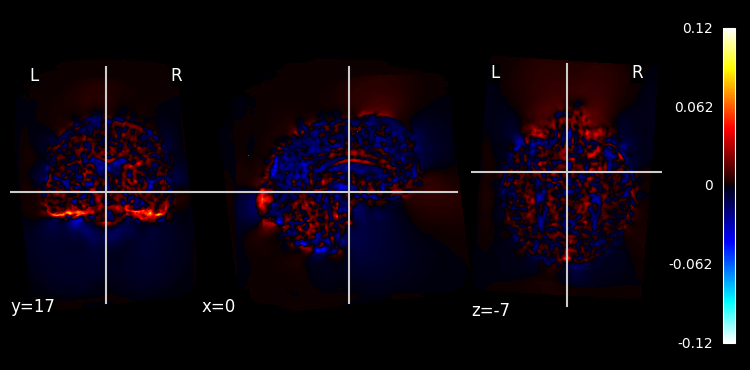

In [105]:
plotting.plot_stat_map("/home/jacob/Desktop/analysis/WR_avg_Control.nii.gz", black_bg=True)

In [ ]:
smooth warp rate, use jet colour map?

# Average PD Warp-Rate

In [85]:
sorted_table = pd.read_pickle('table.pickle')
sorted_table = sorted_table.loc[sorted_table.COHORT == 1.0]
sorted_table = sorted_table.loc[sorted_table.EVENT_ID == "BL"] #so we have unique values in our IDs
control_list = sorted_table.PATNO.tolist()
control_list.remove(3869) #corrupt scan

dir_list = []
for i in control_list:
    #temp_path = "./tessa-etal-2014/ANTs-derivatives/WR_to_GT/sub-" + str(i) + "/ses-BL/anat/WR2GT_1InverseWarp_jacobian_WR.nii.gz"
    temp_path = "/home/jacob/Desktop/analysis/WR_to_GT/sub-" + str(i) + "/ses-BL/anat/WR2GT_1InverseWarp_jacobian_WR.nii.gz"
    dir_list.append(temp_path)
    
create_avg_T1(dir_list, "/home/jacob/Desktop/analysis/WR_avg_Parkinsons.nii.gz")

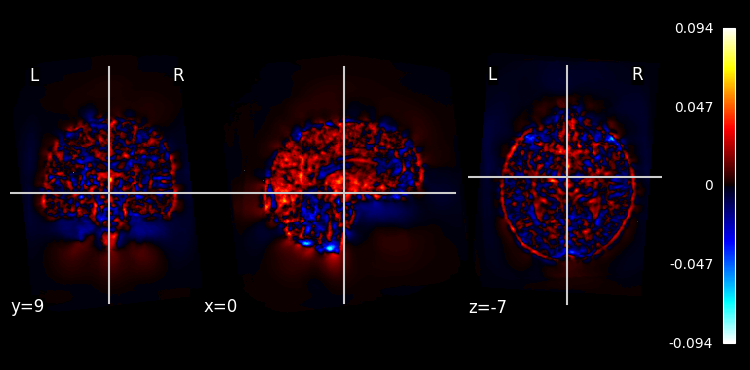

In [104]:
plotting.plot_stat_map("/home/jacob/Desktop/analysis/WR_avg_Parkinsons.nii.gz", black_bg=True)

# Convert statistical maps to MNI space

In [55]:
output_path = "/home/jacob/Desktop/analysis/map2mni_nn"
input_path = "/home/jacob/Desktop/analysis/results1000"
template_path = "/home/jacob/Desktop/tessa-etal-2014_2/MNI152_T1_2mm_brain.nii.gz"

for root, dirs, files in os.walk(input_path):
    for file in files:
        if file.endswith(".nii.gz"):
            print(" ")
            print(file)
            t1_path = root + "/" + file
            output_reg_path = output_path + "/" + file
            output_reg_path1 = output_reg_path.replace(".nii.gz", "_MNI_")
            output_reg_path2 = output_reg_path.replace(".nii.gz", "_MNI_Warped.nii.gz")
            command = "singularity run ../singuant_img.simg antsRegistration --dimensionality 3 --float 0 --output ["+output_reg_path1+","+output_reg_path2+"] --interpolation nearestNeighbor --winsorize-image-intensities [0.005,0.995] --use-histogram-matching 0 --initial-moving-transform [$template,t1_biascorr.nii.gz,1] --transform Rigid[0.1] --metric MI[$template,t1_biascorr.nii.gz,1,32,Regular,0.25] --convergence [1000x500x250x100,1e-6,10] --shrink-factors 8x4x2x1 --smoothing-sigmas 3x2x1x0vox --transform Affine[0.1] --metric MI[$template,t1_biascorr.nii.gz,1,32,Regular,0.25] --convergence [1000x500x250x100,1e-6,10] --shrink-factors 8x4x2x1 --smoothing-sigmas 3x2x1x0vox --transform SyN[0.1,3,0] --metric CC[$template,t1_biascorr.nii.gz,1,4] --convergence [100x70x50x20,1e-6,10] --shrink-factors 8x4x2x1 --smoothing-sigmas 3x2x1x0vox -v"
            command = command.replace("$template", template_path)
            command = command.replace("t1_biascorr.nii.gz", t1_path)
            os.system(command)

 
correlation_BL_tfce_corrp_tstat1.nii.gz
Using double precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: /home/jacob/Desktop/tessa-etal-2014_2/MNI152_T1_2mm_brain.nii.gz and moving image: /home/jacob/Desktop/analysis/results1000/correlation_BL_tfce_corrp_tstat1.nii.gz (type = TranslationTransform)
  number of levels = 4
  number of levels = 4
  number of levels = 4
  fixed image: /home/jacob/Desktop/tessa-etal-2014_2/MNI152_T1_2mm_brain.nii.gz
  moving image: /home/jacob/Desktop/analysis/results1000/correlation_BL_tfce_corrp_tstat1.nii.gz
  fixed image: /home/jacob/Desktop/tessa-etal-2014_2/MNI152_T1_2mm_brain.nii.gz
  moving image: /home/jacob/Desktop/analysis/results1000/correlation_BL_tfce_corrp_tstat1.nii.gz
  fixed image: /home/jacob/Desktop/tessa-etal-2014_2/MNI152_T1_2mm_brain.nii.gz
  moving image: /home/jacob/Desktop/analysis/results1000/correlation_BL_tfce_corrp_tstat1.nii.gz
Di

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -2.933818055090e-01, 1.797693134862e+308, 1.0543e+00, 1.0543e+00, 
*2DIAGNOSTIC,     2, -2.953973429784e-01, 1.797693134862e+308, 1.0570e+00, 2.6612e-03, 
*2DIAGNOSTIC,     3, -2.988559857894e-01, 1.797693134862e+308, 1.0590e+00, 2.0430e-03, 
*2DIAGNOSTIC,     4, -3.004579241373e-01, 1.797693134862e+308, 1.0611e+00, 2.1141e-03, 
*2DIAGNOSTIC,     5, -3.052546780177e-01, 1.797693134862e+308, 1.0645e+00, 3.3779e-03, 
*2DIAGNOSTIC,     6, -3.072098253419e-01, 1.797693134862e+308, 1.0671e+00, 2.5740e-03, 
*2DIAGNOSTIC,     7, -3.079711263724e-01, 1.797

*2DIAGNOSTIC,    15, -8.957026543645e-02, 2.975719175492e-04, 3.3370e+00, 4.1234e-02, 
*2DIAGNOSTIC,    16, -9.184642971379e-02, 7.772468461368e-04, 3.3710e+00, 3.4031e-02, 
*2DIAGNOSTIC,    17, -9.465764672762e-02, 1.641523115982e-03, 3.4147e+00, 4.3635e-02, 
*2DIAGNOSTIC,    18, -1.016438301350e-01, 3.470286964067e-03, 3.4659e+00, 5.1260e-02, 
*2DIAGNOSTIC,    19, -1.026839629708e-01, 4.918758366115e-03, 3.5085e+00, 4.2592e-02, 
*2DIAGNOSTIC,    20, -1.030276512917e-01, 5.825060733293e-03, 3.5432e+00, 3.4695e-02, 
*2DIAGNOSTIC,    21, -1.031009186274e-01, 6.130934415987e-03, 3.5859e+00, 4.2654e-02, 
*2DIAGNOSTIC,    22, -1.036100241029e-01, 5.902497293756e-03, 3.6287e+00, 4.2819e-02, 
*2DIAGNOSTIC,    23, -1.045625598505e-01, 5.262793677977e-03, 3.6859e+00, 5.7213e-02, 
*2DIAGNOSTIC,    24, -1.044182552624e-01, 4.179598422644e-03, 3.7296e+00, 4.3668e-02, 
*2DIAGNOSTIC,    25, -1.041185048204e-01, 2.820957881441e-03, 3.7738e+00, 4.4214e-02, 
*2DIAGNOSTIC,    26, -1.041680360565e-01, 1

*2DIAGNOSTIC,    27, -4.079613488801e-01, 4.317276888625e-04, 1.2742e+00, 4.3368e-03, 
*2DIAGNOSTIC,    28, -4.081301991556e-01, 3.248316748714e-04, 1.2779e+00, 3.6540e-03, 
*2DIAGNOSTIC,    29, -4.084594016268e-01, 2.421200706622e-04, 1.2807e+00, 2.8820e-03, 
*2DIAGNOSTIC,    30, -4.086403992815e-01, 2.126397847087e-04, 1.2847e+00, 3.9861e-03, 
*2DIAGNOSTIC,    31, -4.087972637692e-01, 1.804484562030e-04, 1.2891e+00, 4.4019e-03, 
*2DIAGNOSTIC,    32, -4.089987932790e-01, 1.457892135744e-04, 1.2928e+00, 3.6850e-03, 
*2DIAGNOSTIC,    33, -4.094588649661e-01, 1.167939245983e-04, 1.2966e+00, 3.7961e-03, 
*2DIAGNOSTIC,    34, -4.105247604183e-01, 1.214936223501e-04, 1.3019e+00, 5.2390e-03, 
*2DIAGNOSTIC,    35, -4.112244979910e-01, 1.464683659811e-04, 1.3061e+00, 4.2870e-03, 
*2DIAGNOSTIC,    36, -4.113138605493e-01, 1.630904898543e-04, 1.3146e+00, 8.4250e-03, 
*2DIAGNOSTIC,    37, -4.114057301405e-01, 1.692585628470e-04, 1.3208e+00, 6.1841e-03, 
*2DIAGNOSTIC,    38, -4.114271402950e-01, 1

*2DIAGNOSTIC,   123, -4.370579027593e-01, 3.307864117981e-06, 1.7267e+00, 4.0050e-03, 
*2DIAGNOSTIC,   124, -4.370827636417e-01, 2.815422669786e-06, 1.7299e+00, 3.1900e-03, 
*2DIAGNOSTIC,   125, -4.371370421340e-01, 2.578953974316e-06, 1.7350e+00, 5.1119e-03, 
*2DIAGNOSTIC,   126, -4.371566975611e-01, 2.646151211025e-06, 1.7391e+00, 4.0720e-03, 
*2DIAGNOSTIC,   127, -4.371642747609e-01, 2.682746368009e-06, 1.7429e+00, 3.8040e-03, 
*2DIAGNOSTIC,   128, -4.371713007892e-01, 2.560584443222e-06, 1.7463e+00, 3.3970e-03, 
*2DIAGNOSTIC,   129, -4.371925115121e-01, 2.389787052894e-06, 1.7497e+00, 3.4051e-03, 
*2DIAGNOSTIC,   130, -4.372453945521e-01, 2.536922340479e-06, 1.7546e+00, 4.9639e-03, 
*2DIAGNOSTIC,   131, -4.372664062738e-01, 2.573024579884e-06, 1.7576e+00, 2.9581e-03, 
*2DIAGNOSTIC,   132, -4.373039819339e-01, 2.627843415507e-06, 1.7620e+00, 4.3850e-03, 
*2DIAGNOSTIC,   133, -4.373971094084e-01, 3.009211750143e-06, 1.7646e+00, 2.6789e-03, 
*2DIAGNOSTIC,   134, -4.378160511500e-01, 5

*2DIAGNOSTIC,    72, -2.192237848194e-01, 1.795036470013e-05, 3.4902e+00, 9.2349e-03, 
*2DIAGNOSTIC,    73, -2.192237906770e-01, 1.534477339472e-05, 3.4989e+00, 8.7271e-03, 
*2DIAGNOSTIC,    74, -2.192238005782e-01, 1.260667660256e-05, 3.5089e+00, 9.9719e-03, 
*2DIAGNOSTIC,    75, -2.192238173104e-01, 9.468384101860e-06, 3.5182e+00, 9.3081e-03, 
*2DIAGNOSTIC,    76, -2.192238455736e-01, 6.161867885523e-06, 3.5277e+00, 9.5210e-03, 
*2DIAGNOSTIC,    77, -2.192238932787e-01, 3.028088095235e-06, 3.5585e+00, 3.0771e-02, 
*2DIAGNOSTIC,    78, -2.192239736979e-01, 1.021433085838e-06, 3.5748e+00, 1.6377e-02, 
  Current level = 3 of 4
    number of iterations = 250
    shrink factors = [2, 2, 2]
    smoothing sigmas = 1.0000e+00 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -1.124540744098e-01, 1.797693134862e+308, 4.3212e+00, 7.4632e-01, 
*2DIAGNOSTIC,     2, -1.129480698875e-01, 1.797693134862e+308

*2DIAGNOSTIC,    38, -7.456541699365e-02, 4.044158888365e-05, 2.2621e+01, 5.3935e-01, 
*2DIAGNOSTIC,    39, -7.456564887374e-02, 4.084253691182e-05, 2.3055e+01, 4.3438e-01, 
*2DIAGNOSTIC,    40, -7.456564621093e-02, 3.915101841835e-05, 2.3503e+01, 4.4764e-01, 
*2DIAGNOSTIC,    41, -7.456563071317e-02, 3.451534181835e-05, 2.4218e+01, 7.1554e-01, 
*2DIAGNOSTIC,    42, -7.456563081274e-02, 2.771067082698e-05, 2.4785e+01, 5.6714e-01, 
*2DIAGNOSTIC,    43, -7.456563081359e-02, 1.936233699523e-05, 2.5491e+01, 7.0533e-01, 
*2DIAGNOSTIC,    44, -7.456563081359e-02, 1.187525641780e-05, 2.5924e+01, 4.3322e-01, 
*2DIAGNOSTIC,    45, -7.456563081359e-02, 6.888110213845e-06, 2.6530e+01, 6.0644e-01, 
*2DIAGNOSTIC,    46, -7.456563081359e-02, 2.229763625117e-06, 2.7136e+01, 6.0590e-01, 
  Elapsed time (stage 1): 5.8030e+01


Stage 2
  iterations = 100x70x50x20
  convergence threshold = 1.0000e-06
  convergence window size = 10
  number of levels = 4
  Shrink factors (level 1 out of 4): [8, 8, 8]
  Sh

*1DIAGNOSTIC,    75, -3.983784301104e-01, 4.171993521048e-05, 3.7796e+00, 2.6904e-02, 
*1DIAGNOSTIC,    76, -3.985195311040e-01, 3.872661485716e-05, 3.8074e+00, 2.7841e-02, 
*1DIAGNOSTIC,    77, -3.986472235228e-01, 3.549626014799e-05, 3.8354e+00, 2.7993e-02, 
*1DIAGNOSTIC,    78, -3.987809385277e-01, 3.250201789767e-05, 3.8643e+00, 2.8922e-02, 
*1DIAGNOSTIC,    79, -3.989141051365e-01, 2.991872111494e-05, 3.8935e+00, 2.9153e-02, 
*1DIAGNOSTIC,    80, -3.990349377234e-01, 2.775162923954e-05, 3.9221e+00, 2.8645e-02, 
*1DIAGNOSTIC,    81, -3.991488336723e-01, 2.594881038260e-05, 3.9497e+00, 2.7555e-02, 
*1DIAGNOSTIC,    82, -3.992730817032e-01, 2.452642624803e-05, 3.9775e+00, 2.7803e-02, 
*1DIAGNOSTIC,    83, -3.993919146831e-01, 2.330447444694e-05, 4.0057e+00, 2.8248e-02, 
*1DIAGNOSTIC,    84, -3.995077935302e-01, 2.239165880896e-05, 4.0338e+00, 2.8076e-02, 
*1DIAGNOSTIC,    85, -3.996244121474e-01, 2.167388196008e-05, 4.0649e+00, 3.1128e-02, 
*1DIAGNOSTIC,    86, -3.997315686459e-01, 2

*1DIAGNOSTIC,    23, -4.867387758502e-01, 2.447498284599e-04, 4.8979e+01, 1.3887e+00, 
*1DIAGNOSTIC,    24, -4.869272266759e-01, 2.054585996608e-04, 5.0403e+01, 1.4246e+00, 
*1DIAGNOSTIC,    25, -4.872102538281e-01, 1.722683457149e-04, 5.1808e+01, 1.4042e+00, 
*1DIAGNOSTIC,    26, -4.873463471325e-01, 1.430371357046e-04, 5.3268e+01, 1.4601e+00, 
*1DIAGNOSTIC,    27, -4.875001135957e-01, 1.223614482761e-04, 5.4690e+01, 1.4226e+00, 
*1DIAGNOSTIC,    28, -4.877230374182e-01, 1.043650956693e-04, 5.6097e+01, 1.4064e+00, 
*1DIAGNOSTIC,    29, -4.878234224895e-01, 9.087409761573e-05, 5.7514e+01, 1.4177e+00, 
*1DIAGNOSTIC,    30, -4.879886795217e-01, 7.912012909993e-05, 5.8912e+01, 1.3976e+00, 
*1DIAGNOSTIC,    31, -4.880645838302e-01, 6.817110277411e-05, 6.0325e+01, 1.4132e+00, 
*1DIAGNOSTIC,    32, -4.882240874928e-01, 6.073291253128e-05, 6.1705e+01, 1.3797e+00, 
*1DIAGNOSTIC,    33, -4.882720428305e-01, 5.340223842670e-05, 6.3150e+01, 1.4448e+00, 
*1DIAGNOSTIC,    34, -4.883076949085e-01, 4

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -4.358422198411e-01, 1.797693134862e+308, 1.3442e+00, 1.3442e+00, 
*2DIAGNOSTIC,     2, -4.372170581247e-01, 1.797693134862e+308, 1.3470e+00, 2.7790e-03, 
*2DIAGNOSTIC,     3, -4.421174119013e-01, 1.797693134862e+308, 1.3508e+00, 3.8280e-03, 
*2DIAGNOSTIC,     4, -4.425190155986e-01, 1.797693134862e+308, 1.3535e+00, 2.6472e-03, 
*2DIAGNOSTIC,     5, -4.430817847839e-01, 1.797693134862e+308, 1.3569e+00, 3.3841e-03, 
*2DIAGNOSTIC,     6, -4.432396783271e-01, 1.797693134862e+308, 1.3612e+00, 4.3859e-03, 
*2DIAGNOSTIC,     7, -4.433735413959e-01, 1.797

*2DIAGNOSTIC,     4, -6.933914951811e-02, 1.797693134862e+308, 5.6499e+00, 3.3992e-01, 
*2DIAGNOSTIC,     5, -6.974381110542e-02, 1.797693134862e+308, 5.9922e+00, 3.4233e-01, 
*2DIAGNOSTIC,     6, -6.997201810722e-02, 1.797693134862e+308, 6.3381e+00, 3.4590e-01, 
*2DIAGNOSTIC,     7, -6.979418904856e-02, 1.797693134862e+308, 6.7575e+00, 4.1933e-01, 
*2DIAGNOSTIC,     8, -6.989461318912e-02, 1.797693134862e+308, 7.2541e+00, 4.9662e-01, 
*2DIAGNOSTIC,     9, -6.996031156069e-02, 1.797693134862e+308, 7.5328e+00, 2.7872e-01, 
*2DIAGNOSTIC,    10, -6.997373185997e-02, 1.536323052262e-03, 7.8579e+00, 3.2512e-01, 
*2DIAGNOSTIC,    11, -6.998772825140e-02, 9.776395312417e-04, 8.3646e+00, 5.0670e-01, 
*2DIAGNOSTIC,    12, -6.999141272979e-02, 5.102615804564e-04, 8.8890e+00, 5.2442e-01, 
*2DIAGNOSTIC,    13, -6.999140233968e-02, 3.063822835613e-04, 9.1974e+00, 3.0840e-01, 
*2DIAGNOSTIC,    14, -6.999143196034e-02, 1.311372754139e-04, 9.5307e+00, 3.3330e-01, 
*2DIAGNOSTIC,    15, -6.999144600678e

*2DIAGNOSTIC,    72, -5.337121953687e-01, 1.549241795151e-05, 1.7173e+00, 4.3678e-03, 
*2DIAGNOSTIC,    73, -5.337355885462e-01, 1.142909381628e-05, 1.7210e+00, 3.7091e-03, 
*2DIAGNOSTIC,    74, -5.338474032705e-01, 8.941223092746e-06, 1.7245e+00, 3.4850e-03, 
*2DIAGNOSTIC,    75, -5.340492406713e-01, 8.112700772792e-06, 1.7280e+00, 3.4850e-03, 
*2DIAGNOSTIC,    76, -5.342417571300e-01, 1.030351936356e-05, 1.7312e+00, 3.1898e-03, 
*2DIAGNOSTIC,    77, -5.343941146924e-01, 1.267976582951e-05, 1.7343e+00, 3.1650e-03, 
*2DIAGNOSTIC,    78, -5.344913300502e-01, 1.494669162315e-05, 1.7399e+00, 5.5881e-03, 
*2DIAGNOSTIC,    79, -5.345850127160e-01, 1.674596363766e-05, 1.7430e+00, 3.0839e-03, 
*2DIAGNOSTIC,    80, -5.346578745490e-01, 1.776189493858e-05, 1.7472e+00, 4.1809e-03, 
*2DIAGNOSTIC,    81, -5.348109875137e-01, 1.833678385233e-05, 1.7515e+00, 4.2610e-03, 
*2DIAGNOSTIC,    82, -5.350560537531e-01, 1.886334399185e-05, 1.7561e+00, 4.5929e-03, 
*2DIAGNOSTIC,    83, -5.355192646290e-01, 2

*2DIAGNOSTIC,    45, -2.667956106624e-01, 3.812133716655e-04, 3.2848e+00, 9.3510e-03, 
*2DIAGNOSTIC,    46, -2.671497235087e-01, 3.967118232101e-04, 3.2943e+00, 9.4769e-03, 
*2DIAGNOSTIC,    47, -2.677074936653e-01, 3.933283195730e-04, 3.3047e+00, 1.0354e-02, 
*2DIAGNOSTIC,    48, -2.679812454263e-01, 3.628594221590e-04, 3.3130e+00, 8.3542e-03, 
*2DIAGNOSTIC,    49, -2.682325307661e-01, 3.096799055067e-04, 3.3227e+00, 9.6848e-03, 
*2DIAGNOSTIC,    50, -2.686233867692e-01, 2.448200445457e-04, 3.3330e+00, 1.0312e-02, 
*2DIAGNOSTIC,    51, -2.689033366183e-01, 1.715142538980e-04, 3.3425e+00, 9.5170e-03, 
*2DIAGNOSTIC,    52, -2.691670702874e-01, 1.461933192266e-04, 3.3530e+00, 1.0492e-02, 
*2DIAGNOSTIC,    53, -2.692505154793e-01, 1.348089246538e-04, 3.3617e+00, 8.6281e-03, 
*2DIAGNOSTIC,    54, -2.693454413594e-01, 1.203473946608e-04, 3.3693e+00, 7.6790e-03, 
*2DIAGNOSTIC,    55, -2.694749593452e-01, 1.025793599586e-04, 3.3781e+00, 8.7230e-03, 
*2DIAGNOSTIC,    56, -2.698648547218e-01, 8

*2DIAGNOSTIC,    16, -1.418124000978e-01, 5.766394499630e-05, 5.4728e+00, 4.5261e-02, 
*2DIAGNOSTIC,    17, -1.418190090936e-01, 4.136573575286e-05, 5.5191e+00, 4.6270e-02, 
*2DIAGNOSTIC,    18, -1.418253605480e-01, 2.914182416446e-05, 5.5673e+00, 4.8250e-02, 
*2DIAGNOSTIC,    19, -1.418344548826e-01, 1.995709962263e-05, 5.6150e+00, 4.7706e-02, 
*2DIAGNOSTIC,    20, -1.418479784161e-01, 1.544309322075e-05, 5.6639e+00, 4.8834e-02, 
*2DIAGNOSTIC,    21, -1.418735699569e-01, 1.414008197771e-05, 5.7426e+00, 7.8726e-02, 
*2DIAGNOSTIC,    22, -1.418763394322e-01, 1.628996178585e-05, 5.7878e+00, 4.5252e-02, 
*2DIAGNOSTIC,    23, -1.418918211824e-01, 1.822331199736e-05, 5.8334e+00, 4.5539e-02, 
*2DIAGNOSTIC,    24, -1.419613947114e-01, 2.433523298351e-05, 5.8943e+00, 6.0917e-02, 
*2DIAGNOSTIC,    25, -1.419785069392e-01, 2.922951560692e-05, 5.9438e+00, 4.9557e-02, 
*2DIAGNOSTIC,    26, -1.420852454311e-01, 3.964736581839e-05, 6.0077e+00, 6.3892e-02, 
*2DIAGNOSTIC,    27, -1.421646021698e-01, 5

*1DIAGNOSTIC,    44, -5.295513147597e-01, 9.451362305848e-05, 3.1305e+00, 2.8608e-02, 
*1DIAGNOSTIC,    45, -5.298449066333e-01, 8.841144222148e-05, 3.1583e+00, 2.7857e-02, 
*1DIAGNOSTIC,    46, -5.301268726895e-01, 8.260784076454e-05, 3.2182e+00, 5.9872e-02, 
*1DIAGNOSTIC,    47, -5.303986278172e-01, 7.729229553372e-05, 3.2467e+00, 2.8456e-02, 
*1DIAGNOSTIC,    48, -5.306616538873e-01, 7.250811071456e-05, 3.2758e+00, 2.9121e-02, 
*1DIAGNOSTIC,    49, -5.309123364422e-01, 6.815852422160e-05, 3.3062e+00, 3.0444e-02, 
*1DIAGNOSTIC,    50, -5.311503069519e-01, 6.407221227654e-05, 3.3622e+00, 5.5946e-02, 
*1DIAGNOSTIC,    51, -5.313855635798e-01, 6.029697372625e-05, 3.4063e+00, 4.4106e-02, 
*1DIAGNOSTIC,    52, -5.316178086836e-01, 5.685289091281e-05, 3.4401e+00, 3.3872e-02, 
*1DIAGNOSTIC,    53, -5.318426800289e-01, 5.374342939036e-05, 3.4692e+00, 2.9019e-02, 
*1DIAGNOSTIC,    54, -5.320589017892e-01, 5.095893895220e-05, 3.5003e+00, 3.1174e-02, 
*1DIAGNOSTIC,    55, -5.322665846216e-01, 4

*1DIAGNOSTIC,    35, -3.761633592080e-01, 3.098050361117e-04, 1.5767e+01, 2.9259e-01, 
*1DIAGNOSTIC,    36, -3.767084701661e-01, 2.879815268471e-04, 1.6034e+01, 2.6674e-01, 
*1DIAGNOSTIC,    37, -3.772402696505e-01, 2.683194079474e-04, 1.6275e+01, 2.4093e-01, 
*1DIAGNOSTIC,    38, -3.777642620900e-01, 2.508378578511e-04, 1.6536e+01, 2.6120e-01, 
*1DIAGNOSTIC,    39, -3.782580359957e-01, 2.350816960622e-04, 1.6732e+01, 1.9570e-01, 
*1DIAGNOSTIC,    40, -3.787130414245e-01, 2.201066009480e-04, 1.6935e+01, 2.0358e-01, 
*1DIAGNOSTIC,    41, -3.791322814895e-01, 2.055412810688e-04, 1.7133e+01, 1.9793e-01, 
*1DIAGNOSTIC,    42, -3.795343212149e-01, 1.914711572608e-04, 1.7345e+01, 2.1237e-01, 
*1DIAGNOSTIC,    43, -3.799162971906e-01, 1.779431850500e-04, 1.7546e+01, 2.0042e-01, 
*1DIAGNOSTIC,    44, -3.802799701647e-01, 1.648700003022e-04, 1.7735e+01, 1.8871e-01, 
*1DIAGNOSTIC,    45, -3.805636877973e-01, 1.513334230788e-04, 1.7930e+01, 1.9582e-01, 
*1DIAGNOSTIC,    46, -3.808946052700e-01, 1

*1DIAGNOSTIC,     3, -6.220232061888e-01, 1.797693134862e+308, 1.4828e+02, 1.1269e+01, 
*1DIAGNOSTIC,     4, -6.222350457487e-01, 1.797693134862e+308, 1.5940e+02, 1.1118e+01, 
*1DIAGNOSTIC,     5, -6.225070002330e-01, 1.797693134862e+308, 1.7054e+02, 1.1139e+01, 
*1DIAGNOSTIC,     6, -6.226435805005e-01, 1.797693134862e+308, 1.8216e+02, 1.1619e+01, 
*1DIAGNOSTIC,     7, -6.228668151529e-01, 1.797693134862e+308, 1.9400e+02, 1.1840e+01, 
*1DIAGNOSTIC,     8, -6.230528744520e-01, 1.797693134862e+308, 2.0555e+02, 1.1559e+01, 
*1DIAGNOSTIC,     9, -6.232431555617e-01, 1.797693134862e+308, 2.1740e+02, 1.1842e+01, 
*1DIAGNOSTIC,    10, -6.233909848094e-01, 1.960686181060e-04, 2.2903e+02, 1.1630e+01, 
*1DIAGNOSTIC,    11, -6.235362667604e-01, 1.657016680780e-04, 2.4126e+02, 1.2230e+01, 
*1DIAGNOSTIC,    12, -6.237183524021e-01, 1.434497833539e-04, 2.5305e+02, 1.1797e+01, 
*1DIAGNOSTIC,    13, -6.238563762947e-01, 1.260532318915e-04, 2.6470e+02, 1.1651e+01, 
*1DIAGNOSTIC,    14, -6.239860109201

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -2.941678033523e-01, 1.797693134862e+308, 1.1992e+00, 1.1992e+00, 
*2DIAGNOSTIC,     2, -2.963386054477e-01, 1.797693134862e+308, 1.2015e+00, 2.2929e-03, 
*2DIAGNOSTIC,     3, -2.975083303693e-01, 1.797693134862e+308, 1.2040e+00, 2.4529e-03, 
*2DIAGNOSTIC,     4, -2.975932467285e-01, 1.797693134862e+308, 1.2075e+00, 3.5291e-03, 
*2DIAGNOSTIC,     5, -2.976237195013e-01, 1.797693134862e+308, 1.2097e+00, 2.1911e-03, 
*2DIAGNOSTIC,     6, -2.976709402826e-01, 1.797693134862e+308, 1.2128e+00, 3.0940e-03, 
*2DIAGNOSTIC,     7, -2.977416141927e-01, 1.797

*2DIAGNOSTIC,    21, -1.699505670083e-01, 8.499840042626e-05, 2.4443e+00, 7.0069e-03, 
*2DIAGNOSTIC,    22, -1.699572739737e-01, 6.702089492399e-05, 2.4522e+00, 7.9219e-03, 
*2DIAGNOSTIC,    23, -1.699610648184e-01, 4.532532483473e-05, 2.4776e+00, 2.5398e-02, 
*2DIAGNOSTIC,    24, -1.699610648022e-01, 3.022392179365e-05, 2.5100e+00, 3.2362e-02, 
*2DIAGNOSTIC,    25, -1.699610648022e-01, 1.430148059262e-05, 2.5184e+00, 8.3930e-03, 
*2DIAGNOSTIC,    26, -1.699610648022e-01, 5.636788357820e-06, 2.5272e+00, 8.8680e-03, 
*2DIAGNOSTIC,    27, -1.699610648022e-01, 3.653497211285e-06, 2.5365e+00, 9.2340e-03, 
*2DIAGNOSTIC,    28, -1.699610648022e-01, 2.316768457904e-06, 2.5465e+00, 9.9969e-03, 
*2DIAGNOSTIC,    29, -1.699610648021e-01, 1.519944259620e-06, 2.5544e+00, 7.9770e-03, 
  Current level = 3 of 4
    number of iterations = 250
    shrink factors = [2, 2, 2]
    smoothing sigmas = 1.0000e+00 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATI

*2DIAGNOSTIC,    45, -3.822547755288e-01, 5.400495910765e-05, 1.5655e+00, 3.3219e-03, 
*2DIAGNOSTIC,    46, -3.823456375550e-01, 4.895240397421e-05, 1.5690e+00, 3.4299e-03, 
*2DIAGNOSTIC,    47, -3.827417629716e-01, 5.086071465264e-05, 1.5744e+00, 5.3780e-03, 
*2DIAGNOSTIC,    48, -3.828344146143e-01, 5.123663575813e-05, 1.5772e+00, 2.8381e-03, 
*2DIAGNOSTIC,    49, -3.828681840933e-01, 4.849366925137e-05, 1.5808e+00, 3.5970e-03, 
*2DIAGNOSTIC,    50, -3.829150266609e-01, 4.534477559746e-05, 1.5850e+00, 4.2179e-03, 
*2DIAGNOSTIC,    51, -3.829489891424e-01, 3.984494415637e-05, 1.5899e+00, 4.8561e-03, 
*2DIAGNOSTIC,    52, -3.829803592771e-01, 3.338489771645e-05, 1.5933e+00, 3.4511e-03, 
*2DIAGNOSTIC,    53, -3.824298373113e-01, 2.023878577365e-05, 1.5964e+00, 3.1130e-03, 
*2DIAGNOSTIC,    54, -3.824975390382e-01, 7.964818273403e-06, 1.6000e+00, 3.5460e-03, 
  Current level = 2 of 4
    number of iterations = 500
    shrink factors = [4, 4, 4]
    smoothing sigmas = 2.0000e+00 vox
    r

*2DIAGNOSTIC,    20, -1.057894145260e-01, 1.421938148570e-03, 4.6471e+00, 4.6086e-02, 
*2DIAGNOSTIC,    21, -1.059765014803e-01, 1.217977488607e-03, 4.7006e+00, 5.3477e-02, 
*2DIAGNOSTIC,    22, -1.061058508207e-01, 9.678750615877e-04, 4.7469e+00, 4.6308e-02, 
*2DIAGNOSTIC,    23, -1.063647468818e-01, 7.766991012194e-04, 4.8027e+00, 5.5774e-02, 
*2DIAGNOSTIC,    24, -1.063974005820e-01, 6.167014047866e-04, 4.8497e+00, 4.6973e-02, 
*2DIAGNOSTIC,    25, -1.070778516038e-01, 6.052879397475e-04, 4.9041e+00, 5.4423e-02, 
*2DIAGNOSTIC,    26, -1.071914658919e-01, 5.789123774505e-04, 4.9486e+00, 4.4567e-02, 
*2DIAGNOSTIC,    27, -1.073822104305e-01, 5.419059523486e-04, 4.9950e+00, 4.6384e-02, 
*2DIAGNOSTIC,    28, -1.082633537954e-01, 5.577939709589e-04, 5.0437e+00, 4.8643e-02, 
*2DIAGNOSTIC,    29, -1.123321069332e-01, 9.406808517503e-04, 5.0907e+00, 4.7055e-02, 
*2DIAGNOSTIC,    30, -1.131847994386e-01, 1.319213802697e-03, 5.1634e+00, 7.2646e-02, 
*2DIAGNOSTIC,    31, -1.144624729767e-01, 1

*2DIAGNOSTIC,    63, -6.707244686342e-02, 1.056411149346e-06, 3.1097e+01, 3.5071e-01, 
*2DIAGNOSTIC,    64, -6.707577398625e-02, 1.238925337065e-06, 3.1575e+01, 4.7833e-01, 
*2DIAGNOSTIC,    65, -6.707625239133e-02, 1.373711760191e-06, 3.1919e+01, 3.4365e-01, 
*2DIAGNOSTIC,    66, -6.707740030614e-02, 1.485313491912e-06, 3.2270e+01, 3.5065e-01, 
*2DIAGNOSTIC,    67, -6.708013876475e-02, 1.652612162482e-06, 3.2748e+01, 4.7832e-01, 
*2DIAGNOSTIC,    68, -6.708046789724e-02, 1.712133187927e-06, 3.3142e+01, 3.9401e-01, 
*2DIAGNOSTIC,    69, -6.708086253028e-02, 1.667473917260e-06, 3.3492e+01, 3.5043e-01, 
*2DIAGNOSTIC,    70, -6.708158077615e-02, 1.659960732878e-06, 3.3839e+01, 3.4680e-01, 
*2DIAGNOSTIC,    71, -6.708275459544e-02, 1.569112312833e-06, 3.4186e+01, 3.4679e-01, 
*2DIAGNOSTIC,    72, -6.708538111694e-02, 1.502790504919e-06, 3.4587e+01, 4.0097e-01, 
*2DIAGNOSTIC,    73, -6.708566903450e-02, 1.360642748737e-06, 3.5070e+01, 4.8289e-01, 
*2DIAGNOSTIC,    74, -6.708615483983e-02, 1

*1DIAGNOSTIC,    50, -3.722957978323e-01, 2.939700791722e-05, 1.1828e+01, 1.8183e-01, 
*1DIAGNOSTIC,    51, -3.723736221535e-01, 1.633310557127e-05, 1.2014e+01, 1.8585e-01, 
*1DIAGNOSTIC,    52, -3.724552801219e-01, 6.367097336819e-06, 1.2194e+01, 1.7995e-01, 
*1DIAGNOSTIC,    53, -3.725373432454e-01, -3.284907510587e-08, 1.2382e+01, 1.8847e-01, 
  Current level = 3 of 4
    number of iterations = 50
    shrink factors = [2, 2, 2]
    smoothing sigmas = 1.0000e+00 vox
    required fixed parameters = [45, 54, 45, -88, 124, -70, 4, 4, 4, 1, 0, 0, 0, -1, 0, 0, 0, 1]
XXDIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*1DIAGNOSTIC,     1, -4.638733556760e-01, 1.797693134862e+308, 1.4355e+01, 1.9730e+00, 
*1DIAGNOSTIC,     2, -4.652323890610e-01, 1.797693134862e+308, 1.5738e+01, 1.3830e+00, 
*1DIAGNOSTIC,     3, -4.669358750720e-01, 1.797693134862e+308, 1.7164e+01, 1.4263e+00, 
*1DIAGNOSTIC,     4, -4.684811924134e-01, 1.797693134862e+308, 1.8571e+01, 1.4070e

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -3.876359593539e-01, 1.797693134862e+308, 1.1928e+00, 1.1928e+00, 
*2DIAGNOSTIC,     2, -3.898391079012e-01, 1.797693134862e+308, 1.1952e+00, 2.3601e-03, 
*2DIAGNOSTIC,     3, -3.932711080278e-01, 1.797693134862e+308, 1.1976e+00, 2.3880e-03, 
*2DIAGNOSTIC,     4, -3.967536604323e-01, 1.797693134862e+308, 1.2001e+00, 2.5220e-03, 
*2DIAGNOSTIC,     5, -3.986038994849e-01, 1.797693134862e+308, 1.2020e+00, 1.9271e-03, 
*2DIAGNOSTIC,     6, -4.006967148452e-01, 1.797693134862e+308, 1.2049e+00, 2.8820e-03, 
*2DIAGNOSTIC,     7, -4.026892552508e-01, 1.797

*2DIAGNOSTIC,     3, -6.278341808153e-02, 1.797693134862e+308, 5.3433e+00, 2.5210e-01, 
*2DIAGNOSTIC,     4, -6.278444996448e-02, 1.797693134862e+308, 5.5974e+00, 2.5411e-01, 
*2DIAGNOSTIC,     5, -6.278795706475e-02, 1.797693134862e+308, 5.8464e+00, 2.4906e-01, 
*2DIAGNOSTIC,     6, -6.279324988360e-02, 1.797693134862e+308, 6.0971e+00, 2.5064e-01, 
*2DIAGNOSTIC,     7, -6.281121469865e-02, 1.797693134862e+308, 6.5547e+00, 4.5761e-01, 
*2DIAGNOSTIC,     8, -6.281749419575e-02, 1.797693134862e+308, 6.9331e+00, 3.7838e-01, 
*2DIAGNOSTIC,     9, -6.281776816108e-02, 1.797693134862e+308, 7.2279e+00, 2.9481e-01, 
*2DIAGNOSTIC,    10, -6.281788124600e-02, 6.424304087387e-05, 7.5656e+00, 3.3771e-01, 
*2DIAGNOSTIC,    11, -6.281796474347e-02, 4.383502548919e-05, 8.5847e+00, 1.0191e+00, 
*2DIAGNOSTIC,    12, -6.281796474266e-02, 3.702274601604e-05, 9.4238e+00, 8.3911e-01, 
*2DIAGNOSTIC,    13, -6.281796474266e-02, 2.822885276613e-05, 9.8450e+00, 4.2114e-01, 
*2DIAGNOSTIC,    14, -6.281796474266

*2DIAGNOSTIC,     2, -2.180693103181e-01, 1.797693134862e+308, 2.5233e+00, 7.7300e-03, 
*2DIAGNOSTIC,     3, -2.187975445095e-01, 1.797693134862e+308, 2.5314e+00, 8.1599e-03, 
*2DIAGNOSTIC,     4, -2.199144679737e-01, 1.797693134862e+308, 2.5408e+00, 9.3791e-03, 
*2DIAGNOSTIC,     5, -2.222360213370e-01, 1.797693134862e+308, 2.5492e+00, 8.4240e-03, 
*2DIAGNOSTIC,     6, -2.204890853110e-01, 1.797693134862e+308, 2.5565e+00, 7.2379e-03, 
*2DIAGNOSTIC,     7, -2.254578936464e-01, 1.797693134862e+308, 2.5656e+00, 9.1522e-03, 
*2DIAGNOSTIC,     8, -2.266436271238e-01, 1.797693134862e+308, 2.5760e+00, 1.0404e-02, 
*2DIAGNOSTIC,     9, -2.267726960900e-01, 1.797693134862e+308, 2.5842e+00, 8.1720e-03, 
*2DIAGNOSTIC,    10, -2.272201065696e-01, 3.199065396733e-03, 2.5932e+00, 9.0442e-03, 
*2DIAGNOSTIC,    11, -2.276576560555e-01, 2.857726867345e-03, 2.6035e+00, 1.0293e-02, 
*2DIAGNOSTIC,    12, -2.278008621879e-01, 2.376544155441e-03, 2.6125e+00, 8.9350e-03, 
*2DIAGNOSTIC,    13, -2.28005279320

*2DIAGNOSTIC,    15, -1.338956925708e-01, 3.562057443899e-03, 4.6436e+00, 4.4762e-02, 
*2DIAGNOSTIC,    16, -1.341930676930e-01, 2.256701985178e-03, 4.6905e+00, 4.6915e-02, 
*2DIAGNOSTIC,    17, -1.345987243644e-01, 1.440136056752e-03, 4.7464e+00, 5.5953e-02, 
*2DIAGNOSTIC,    18, -1.353258416270e-01, 1.024366480368e-03, 4.7919e+00, 4.5495e-02, 
*2DIAGNOSTIC,    19, -1.361148129901e-01, 9.533115431536e-04, 4.8773e+00, 8.5413e-02, 
*2DIAGNOSTIC,    20, -1.363704848666e-01, 9.021225223526e-04, 4.9382e+00, 6.0830e-02, 
*2DIAGNOSTIC,    21, -1.363876412147e-01, 9.128242768906e-04, 4.9844e+00, 4.6215e-02, 
*2DIAGNOSTIC,    22, -1.364279171013e-01, 8.496136905064e-04, 5.0303e+00, 4.5939e-02, 
*2DIAGNOSTIC,    23, -1.364836672537e-01, 7.339102893389e-04, 5.0749e+00, 4.4617e-02, 
*2DIAGNOSTIC,    24, -1.365611950968e-01, 5.927140998568e-04, 5.1202e+00, 4.5261e-02, 
*2DIAGNOSTIC,    25, -1.366447489082e-01, 4.487484040369e-04, 5.1673e+00, 4.7086e-02, 
*2DIAGNOSTIC,    26, -1.367452002785e-01, 3

*1DIAGNOSTIC,    28, -3.906358652189e-01, 1.832875632473e-05, 2.1168e+00, 2.9254e-02, 
*1DIAGNOSTIC,    29, -3.907428370081e-01, 2.212315066125e-05, 2.1451e+00, 2.8264e-02, 
*1DIAGNOSTIC,    30, -3.908746144566e-01, 2.828203611811e-05, 2.1729e+00, 2.7826e-02, 
*1DIAGNOSTIC,    31, -3.910263966839e-01, 3.561771419057e-05, 2.2006e+00, 2.7710e-02, 
*1DIAGNOSTIC,    32, -3.911827996235e-01, 4.282238537863e-05, 2.2289e+00, 2.8292e-02, 
*1DIAGNOSTIC,    33, -3.913343895507e-01, 4.885343390386e-05, 2.2576e+00, 2.8682e-02, 
*1DIAGNOSTIC,    34, -3.914749894143e-01, 5.324799394518e-05, 2.2817e+00, 2.4081e-02, 
*1DIAGNOSTIC,    35, -3.916043620038e-01, 5.569797047067e-05, 2.3095e+00, 2.7768e-02, 
*1DIAGNOSTIC,    36, -3.917293890749e-01, 5.665726673170e-05, 2.3374e+00, 2.7991e-02, 
*1DIAGNOSTIC,    37, -3.918515196059e-01, 5.597461051753e-05, 2.3660e+00, 2.8559e-02, 
*1DIAGNOSTIC,    38, -3.919666563545e-01, 5.384334276558e-05, 2.3948e+00, 2.8752e-02, 
*1DIAGNOSTIC,    39, -3.920924009516e-01, 5

*1DIAGNOSTIC,    19, -3.527945268111e-01, 4.492931241465e-04, 8.5684e+00, 1.8249e-01, 
*1DIAGNOSTIC,    20, -3.529893986444e-01, 3.566750713043e-04, 8.7529e+00, 1.8446e-01, 
*1DIAGNOSTIC,    21, -3.533157675396e-01, 2.994333099573e-04, 8.9450e+00, 1.9211e-01, 
*1DIAGNOSTIC,    22, -3.535363775039e-01, 2.549295560180e-04, 9.1384e+00, 1.9344e-01, 
*1DIAGNOSTIC,    23, -3.537348471094e-01, 2.193848466990e-04, 9.3193e+00, 1.8090e-01, 
*1DIAGNOSTIC,    24, -3.539184607949e-01, 1.907029381240e-04, 9.5014e+00, 1.8204e-01, 
*1DIAGNOSTIC,    25, -3.540875184676e-01, 1.668026777902e-04, 9.6858e+00, 1.8440e-01, 
*1DIAGNOSTIC,    26, -3.542704973654e-01, 1.469938818349e-04, 9.8700e+00, 1.8420e-01, 
*1DIAGNOSTIC,    27, -3.544239389022e-01, 1.306317411425e-04, 1.0059e+01, 1.8911e-01, 
*1DIAGNOSTIC,    28, -3.545659511404e-01, 1.168534375552e-04, 1.0241e+01, 1.8216e-01, 
*1DIAGNOSTIC,    29, -3.546914078306e-01, 1.046091062486e-04, 1.0423e+01, 1.8195e-01, 
*1DIAGNOSTIC,    30, -3.548282030339e-01, 9

*1DIAGNOSTIC,    40, -4.698603620324e-01, 4.874741739508e-05, 7.4337e+01, 1.3815e+00, 
*1DIAGNOSTIC,    41, -4.694508983279e-01, 3.398465021528e-05, 7.5736e+01, 1.3996e+00, 
*1DIAGNOSTIC,    42, -4.694530000833e-01, 2.223991497840e-05, 7.7140e+01, 1.4043e+00, 
*1DIAGNOSTIC,    43, -4.695853230486e-01, 1.491872652740e-05, 7.8527e+01, 1.3861e+00, 
*1DIAGNOSTIC,    44, -4.695580562287e-01, 7.755433424295e-06, 7.9974e+01, 1.4471e+00, 
*1DIAGNOSTIC,    45, -4.697216665204e-01, 4.183529079327e-06, 8.1396e+01, 1.4227e+00, 
*1DIAGNOSTIC,    46, -4.698867261912e-01, 4.351257778253e-06, 8.2812e+01, 1.4161e+00, 
*1DIAGNOSTIC,    47, -4.699385558796e-01, 6.215375768032e-06, 8.4216e+01, 1.4040e+00, 
*1DIAGNOSTIC,    48, -4.698208156605e-01, 7.629914733503e-06, 8.5663e+01, 1.4464e+00, 
*1DIAGNOSTIC,    49, -4.698062528136e-01, 9.796270598213e-06, 8.7048e+01, 1.3854e+00, 
*1DIAGNOSTIC,    50, -4.697818464878e-01, 1.243845304958e-05, 8.8443e+01, 1.3952e+00, 
  Current level = 4 of 4
    number of iter

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -7.707297904386e-02, 1.797693134862e+308, 1.2064e+00, 1.2064e+00, 
*2DIAGNOSTIC,     2, -7.896775420523e-02, 1.797693134862e+308, 1.2086e+00, 2.1429e-03, 
*2DIAGNOSTIC,     3, -8.118660943515e-02, 1.797693134862e+308, 1.2108e+00, 2.1901e-03, 
*2DIAGNOSTIC,     4, -8.342973270825e-02, 1.797693134862e+308, 1.2130e+00, 2.2411e-03, 
*2DIAGNOSTIC,     5, -8.519524747965e-02, 1.797693134862e+308, 1.2233e+00, 1.0345e-02, 
*2DIAGNOSTIC,     6, -9.124230573086e-02, 1.797693134862e+308, 1.2262e+00, 2.8410e-03, 
*2DIAGNOSTIC,     7, -9.989964616521e-02, 1.797

*2DIAGNOSTIC,    27, -4.044749115245e-02, 6.006995462058e-05, 2.4981e+00, 1.2187e-02, 
*2DIAGNOSTIC,    28, -4.044749115290e-02, 4.856708773041e-05, 2.5086e+00, 1.0453e-02, 
*2DIAGNOSTIC,    29, -4.044749115292e-02, 3.598759018634e-05, 2.5218e+00, 1.3245e-02, 
*2DIAGNOSTIC,    30, -4.044749115292e-02, 2.400835145499e-05, 2.5295e+00, 7.6461e-03, 
*2DIAGNOSTIC,    31, -4.044749115292e-02, 1.488321830357e-05, 2.5376e+00, 8.1110e-03, 
*2DIAGNOSTIC,    32, -4.044749115292e-02, 7.234490880026e-06, 2.5461e+00, 8.5602e-03, 
  Current level = 3 of 4
    number of iterations = 250
    shrink factors = [2, 2, 2]
    smoothing sigmas = 1.0000e+00 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -1.469840473068e-02, 1.797693134862e+308, 3.1803e+00, 6.3414e-01, 
*2DIAGNOSTIC,     2, -1.472939260569e-02, 1.797693134862e+308, 3.2177e+00, 3.7459e-02, 
*2DIAGNOSTIC,     3, -1.475160621892e-02, 1.797693134862e+30

*2DIAGNOSTIC,    18, -1.127874205898e-01, 3.326819452550e-03, 1.4547e+00, 3.5751e-03, 
*2DIAGNOSTIC,    19, -1.129544588059e-01, 4.041083801295e-03, 1.4596e+00, 4.9050e-03, 
*2DIAGNOSTIC,    20, -1.130326983528e-01, 4.332047353213e-03, 1.4637e+00, 4.1461e-03, 
*2DIAGNOSTIC,    21, -1.130514460669e-01, 4.210751653779e-03, 1.4676e+00, 3.8521e-03, 
*2DIAGNOSTIC,    22, -1.129727732682e-01, 3.737944413689e-03, 1.4714e+00, 3.8271e-03, 
*2DIAGNOSTIC,    23, -1.130358710970e-01, 2.987648137436e-03, 1.4748e+00, 3.4218e-03, 
*2DIAGNOSTIC,    24, -1.131008851138e-01, 2.068445940411e-03, 1.4788e+00, 3.9711e-03, 
*2DIAGNOSTIC,    25, -1.131403928060e-01, 1.081494841397e-03, 1.4825e+00, 3.6831e-03, 
*2DIAGNOSTIC,    26, -1.130176082067e-01, 2.099510744928e-04, 1.4864e+00, 3.9098e-03, 
*2DIAGNOSTIC,    27, -1.134102709291e-01, 7.888863532579e-05, 1.4902e+00, 3.8388e-03, 
*2DIAGNOSTIC,    28, -1.134932691260e-01, 8.996704338783e-05, 1.4937e+00, 3.4740e-03, 
*2DIAGNOSTIC,    29, -1.133634344130e-01, 9

*2DIAGNOSTIC,     3, -3.991442111650e-02, 1.797693134862e+308, 2.6885e+00, 9.6519e-03, 
*2DIAGNOSTIC,     4, -4.148501984720e-02, 1.797693134862e+308, 2.6955e+00, 7.0500e-03, 
*2DIAGNOSTIC,     5, -4.168179203658e-02, 1.797693134862e+308, 2.7047e+00, 9.1479e-03, 
*2DIAGNOSTIC,     6, -4.187537850128e-02, 1.797693134862e+308, 2.7124e+00, 7.7178e-03, 
*2DIAGNOSTIC,     7, -4.216736500490e-02, 1.797693134862e+308, 2.7196e+00, 7.1859e-03, 
*2DIAGNOSTIC,     8, -4.253124803449e-02, 1.797693134862e+308, 2.7290e+00, 9.4271e-03, 
*2DIAGNOSTIC,     9, -4.271810225291e-02, 1.797693134862e+308, 2.7402e+00, 1.1239e-02, 
*2DIAGNOSTIC,    10, -4.273989838420e-02, 6.384032498346e-03, 2.7479e+00, 7.6861e-03, 
*2DIAGNOSTIC,    11, -4.280552445732e-02, 4.584164119359e-03, 2.7554e+00, 7.4589e-03, 
*2DIAGNOSTIC,    12, -4.286339431187e-02, 3.020169082773e-03, 2.7631e+00, 7.7221e-03, 
*2DIAGNOSTIC,    13, -4.289875052871e-02, 1.782982387491e-03, 2.7709e+00, 7.8049e-03, 
*2DIAGNOSTIC,    14, -4.294082506198

*2DIAGNOSTIC,    18, -7.074398085150e-03, 4.127238360120e-04, 1.4664e+01, 5.0637e-01, 
*2DIAGNOSTIC,    19, -7.074398085149e-03, 2.905459531314e-04, 1.5202e+01, 5.3766e-01, 
*2DIAGNOSTIC,    20, -7.074398085149e-03, 1.841722220228e-04, 1.5764e+01, 5.6184e-01, 
*2DIAGNOSTIC,    21, -7.074398085149e-03, 1.042896522361e-04, 1.6346e+01, 5.8198e-01, 
*2DIAGNOSTIC,    22, -7.074398085149e-03, 4.780278108971e-05, 1.7018e+01, 6.7258e-01, 
*2DIAGNOSTIC,    23, -7.074398085149e-03, 1.968664979980e-05, 1.7551e+01, 5.3262e-01, 
*2DIAGNOSTIC,    24, -7.074398085149e-03, 1.187662673985e-06, 1.8149e+01, 5.9803e-01, 
  Elapsed time (stage 1): 3.2503e+01


Stage 2
  iterations = 100x70x50x20
  convergence threshold = 1.0000e-06
  convergence window size = 10
  number of levels = 4
  Shrink factors (level 1 out of 4): [8, 8, 8]
  Shrink factors (level 2 out of 4): [4, 4, 4]
  Shrink factors (level 3 out of 4): [2, 2, 2]
  Shrink factors (level 4 out of 4): [1, 1, 1]
  smoothing sigmas per level: [3, 2, 

*1DIAGNOSTIC,    78, -1.809836930729e-01, 1.350997510823e-04, 3.8281e+00, 2.7910e-02, 
*1DIAGNOSTIC,    79, -1.811550446495e-01, 1.235975754697e-04, 3.8578e+00, 2.9690e-02, 
*1DIAGNOSTIC,    80, -1.813174591965e-01, 1.132059612433e-04, 3.8863e+00, 2.8515e-02, 
*1DIAGNOSTIC,    81, -1.814721891068e-01, 1.038517081239e-04, 3.9145e+00, 2.8185e-02, 
*1DIAGNOSTIC,    82, -1.816165534244e-01, 9.538737076075e-05, 3.9429e+00, 2.8431e-02, 
*1DIAGNOSTIC,    83, -1.817529146374e-01, 8.769525136172e-05, 3.9716e+00, 2.8689e-02, 
*1DIAGNOSTIC,    84, -1.818807317312e-01, 8.078567226132e-05, 4.0009e+00, 2.9306e-02, 
*1DIAGNOSTIC,    85, -1.820014904539e-01, 7.467018665529e-05, 4.0310e+00, 3.0027e-02, 
*1DIAGNOSTIC,    86, -1.821172629337e-01, 6.925548766399e-05, 4.0603e+00, 2.9370e-02, 
*1DIAGNOSTIC,    87, -1.822254125799e-01, 6.435537712138e-05, 4.0910e+00, 3.0635e-02, 
*1DIAGNOSTIC,    88, -1.823266419941e-01, 5.982251621722e-05, 4.1189e+00, 2.7931e-02, 
*1DIAGNOSTIC,    89, -1.824215709773e-01, 5

*1DIAGNOSTIC,     2, -9.005925349404e-01, 1.797693134862e+308, 1.1444e+02, 1.3133e+01, 
*1DIAGNOSTIC,     3, -9.006583917645e-01, 1.797693134862e+308, 1.2663e+02, 1.2195e+01, 
*1DIAGNOSTIC,     4, -9.007929931964e-01, 1.797693134862e+308, 1.3867e+02, 1.2039e+01, 
*1DIAGNOSTIC,     5, -9.009427571215e-01, 1.797693134862e+308, 1.5098e+02, 1.2312e+01, 
*1DIAGNOSTIC,     6, -9.010230465549e-01, 1.797693134862e+308, 1.6312e+02, 1.2142e+01, 
*1DIAGNOSTIC,     7, -9.009985845862e-01, 1.797693134862e+308, 1.7559e+02, 1.2467e+01, 
*1DIAGNOSTIC,     8, -9.010321326351e-01, 1.797693134862e+308, 1.8759e+02, 1.1998e+01, 
*1DIAGNOSTIC,     9, -9.012588061313e-01, 1.797693134862e+308, 1.9983e+02, 1.2238e+01, 
*1DIAGNOSTIC,    10, -9.013263393237e-01, 5.721073517863e-05, 2.1154e+02, 1.1709e+01, 
*1DIAGNOSTIC,    11, -9.012791635957e-01, 4.723397776762e-05, 2.2342e+02, 1.1879e+01, 
*1DIAGNOSTIC,    12, -9.013448686153e-01, 3.964798147617e-05, 2.3565e+02, 1.2232e+01, 
*1DIAGNOSTIC,    13, -9.01473190250

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -3.419323595750e-01, 1.797693134862e+308, 1.4877e+00, 1.4877e+00, 
*2DIAGNOSTIC,     2, -3.432216799672e-01, 1.797693134862e+308, 1.4907e+00, 3.0620e-03, 
*2DIAGNOSTIC,     3, -3.450938816790e-01, 1.797693134862e+308, 1.4938e+00, 3.1152e-03, 
*2DIAGNOSTIC,     4, -3.486288849517e-01, 1.797693134862e+308, 1.4975e+00, 3.6111e-03, 
*2DIAGNOSTIC,     5, -3.512350382908e-01, 1.797693134862e+308, 1.5081e+00, 1.0627e-02, 
*2DIAGNOSTIC,     6, -3.516871562452e-01, 1.797693134862e+308, 1.5217e+00, 1.3610e-02, 
*2DIAGNOSTIC,     7, -3.517058805057e-01, 1.797

*2DIAGNOSTIC,     2, -5.357901927410e-02, 1.797693134862e+308, 5.7443e+00, 2.6980e-01, 
*2DIAGNOSTIC,     3, -5.391994016902e-02, 1.797693134862e+308, 5.9977e+00, 2.5340e-01, 
*2DIAGNOSTIC,     4, -5.404866226304e-02, 1.797693134862e+308, 6.2915e+00, 2.9377e-01, 
*2DIAGNOSTIC,     5, -5.471864795032e-02, 1.797693134862e+308, 6.6038e+00, 3.1232e-01, 
*2DIAGNOSTIC,     6, -5.489417259998e-02, 1.797693134862e+308, 6.9392e+00, 3.3533e-01, 
*2DIAGNOSTIC,     7, -5.684411616072e-02, 1.797693134862e+308, 7.1911e+00, 2.5194e-01, 
*2DIAGNOSTIC,     8, -5.724164562441e-02, 1.797693134862e+308, 7.4619e+00, 2.7084e-01, 
*2DIAGNOSTIC,     9, -5.925730585021e-02, 1.797693134862e+308, 7.7819e+00, 3.1997e-01, 
*2DIAGNOSTIC,    10, -6.214474453550e-02, 8.958699844552e-03, 8.4822e+00, 7.0031e-01, 
*2DIAGNOSTIC,    11, -6.237678335248e-02, 9.657486215021e-03, 8.9582e+00, 4.7595e-01, 
*2DIAGNOSTIC,    12, -6.246632836468e-02, 9.605891932282e-03, 9.7555e+00, 7.9737e-01, 
*2DIAGNOSTIC,    13, -6.24687523490

*2DIAGNOSTIC,    62, -5.436026113624e-01, 5.179036643346e-05, 2.2319e+00, 7.3528e-03, 
*2DIAGNOSTIC,    63, -5.439550659388e-01, 6.011103253201e-05, 2.2397e+00, 7.7929e-03, 
*2DIAGNOSTIC,    64, -5.441356438980e-01, 6.423562705169e-05, 2.2437e+00, 4.0021e-03, 
*2DIAGNOSTIC,    65, -5.443843177418e-01, 6.440437630225e-05, 2.2520e+00, 8.2569e-03, 
*2DIAGNOSTIC,    66, -5.449176627694e-01, 6.294007148766e-05, 2.2564e+00, 4.4720e-03, 
*2DIAGNOSTIC,    67, -5.454336611856e-01, 6.559504885334e-05, 2.2692e+00, 1.2773e-02, 
*2DIAGNOSTIC,    68, -5.454978020290e-01, 6.316111645784e-05, 2.2736e+00, 4.3411e-03, 
*2DIAGNOSTIC,    69, -5.457316065526e-01, 5.832607428736e-05, 2.2777e+00, 4.1871e-03, 
*2DIAGNOSTIC,    70, -5.459209545622e-01, 5.076329406072e-05, 2.2848e+00, 7.0388e-03, 
*2DIAGNOSTIC,    71, -5.460509379065e-01, 4.620180032007e-05, 2.2885e+00, 3.7599e-03, 
*2DIAGNOSTIC,    72, -5.463792424507e-01, 4.301253478955e-05, 2.2933e+00, 4.7829e-03, 
*2DIAGNOSTIC,    73, -5.464681645132e-01, 3

*2DIAGNOSTIC,     2, -1.239414007544e-01, 1.797693134862e+308, 5.3058e+00, 6.7803e-02, 
*2DIAGNOSTIC,     3, -1.248107444893e-01, 1.797693134862e+308, 5.3741e+00, 6.8327e-02, 
*2DIAGNOSTIC,     4, -1.259556038423e-01, 1.797693134862e+308, 5.4337e+00, 5.9610e-02, 
*2DIAGNOSTIC,     5, -1.280406119431e-01, 1.797693134862e+308, 5.4983e+00, 6.4574e-02, 
*2DIAGNOSTIC,     6, -1.291474302154e-01, 1.797693134862e+308, 5.6228e+00, 1.2452e-01, 
*2DIAGNOSTIC,     7, -1.299460194468e-01, 1.797693134862e+308, 5.7006e+00, 7.7807e-02, 
*2DIAGNOSTIC,     8, -1.300431439403e-01, 1.797693134862e+308, 5.7845e+00, 8.3877e-02, 
*2DIAGNOSTIC,     9, -1.301568327863e-01, 1.797693134862e+308, 5.8588e+00, 7.4281e-02, 
*2DIAGNOSTIC,    10, -1.303123913735e-01, 3.967608304070e-03, 5.9235e+00, 6.4748e-02, 
*2DIAGNOSTIC,    11, -1.305330036823e-01, 3.115047782899e-03, 6.0053e+00, 8.1745e-02, 
*2DIAGNOSTIC,    12, -1.306755295135e-01, 2.208938684614e-03, 6.0906e+00, 8.5309e-02, 
*2DIAGNOSTIC,    13, -1.30842416252

*2DIAGNOSTIC,    28, -6.764161590013e-02, 1.273024910738e-04, 2.7776e+01, 7.0736e-01, 
*2DIAGNOSTIC,    29, -6.765428311993e-02, 9.544807622196e-05, 2.8343e+01, 5.6743e-01, 
*2DIAGNOSTIC,    30, -6.766026802179e-02, 8.735664010271e-05, 2.8867e+01, 5.2439e-01, 
*2DIAGNOSTIC,    31, -6.767305679353e-02, 7.693445853800e-05, 2.9391e+01, 5.2406e-01, 
*2DIAGNOSTIC,    32, -6.769242930787e-02, 6.643550956607e-05, 3.0132e+01, 7.4037e-01, 
*2DIAGNOSTIC,    33, -6.770152441413e-02, 5.649872947271e-05, 3.0658e+01, 5.2574e-01, 
*2DIAGNOSTIC,    34, -6.770457926109e-02, 4.480281740214e-05, 3.1249e+01, 5.9183e-01, 
*2DIAGNOSTIC,    35, -6.771487116976e-02, 3.664804252072e-05, 3.2015e+01, 7.6551e-01, 
*2DIAGNOSTIC,    36, -6.772157019242e-02, 2.771647910176e-05, 3.3848e+01, 1.8333e+00, 
*2DIAGNOSTIC,    37, -6.772157005124e-02, 2.238031335034e-05, 3.5562e+01, 1.7136e+00, 
*2DIAGNOSTIC,    38, -6.772157005123e-02, 1.870806838576e-05, 3.6332e+01, 7.7050e-01, 
*2DIAGNOSTIC,    39, -6.772157005123e-02, 1

XXDIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*1DIAGNOSTIC,     1, -2.992966121447e-01, 1.797693134862e+308, 5.7503e+00, 1.2127e+00, 
*1DIAGNOSTIC,     2, -3.042443031126e-01, 1.797693134862e+308, 5.9511e+00, 2.0081e-01, 
*1DIAGNOSTIC,     3, -3.079569764548e-01, 1.797693134862e+308, 6.1515e+00, 2.0046e-01, 
*1DIAGNOSTIC,     4, -3.112203354270e-01, 1.797693134862e+308, 6.3661e+00, 2.1456e-01, 
*1DIAGNOSTIC,     5, -3.137802839205e-01, 1.797693134862e+308, 6.5991e+00, 2.3302e-01, 
*1DIAGNOSTIC,     6, -3.161634428544e-01, 1.797693134862e+308, 6.7962e+00, 1.9705e-01, 
*1DIAGNOSTIC,     7, -3.182241700674e-01, 1.797693134862e+308, 6.9996e+00, 2.0348e-01, 
*1DIAGNOSTIC,     8, -3.199386668000e-01, 1.797693134862e+308, 7.2661e+00, 2.6645e-01, 
*1DIAGNOSTIC,     9, -3.214670135188e-01, 1.797693134862e+308, 7.5298e+00, 2.6370e-01, 
*1DIAGNOSTIC,    10, -3.227508842553e-01, 4.585372927165e-03, 7.7867e+00, 2.5690e-01, 
*1DIAGNOSTIC,    11, -3.238827712204e

*1DIAGNOSTIC,    21, -4.259838167676e-01, 2.418616559924e-04, 5.0490e+01, 1.4504e+00, 
*1DIAGNOSTIC,    22, -4.262578873759e-01, 2.054024890149e-04, 5.2003e+01, 1.5133e+00, 
*1DIAGNOSTIC,    23, -4.265548765839e-01, 1.774848826762e-04, 5.3441e+01, 1.4373e+00, 
*1DIAGNOSTIC,    24, -4.269213092836e-01, 1.621852544113e-04, 5.4949e+01, 1.5086e+00, 
*1DIAGNOSTIC,    25, -4.270835011192e-01, 1.495462981380e-04, 5.6373e+01, 1.4239e+00, 
*1DIAGNOSTIC,    26, -4.272655331488e-01, 1.397533010821e-04, 5.7777e+01, 1.4038e+00, 
*1DIAGNOSTIC,    27, -4.275405058086e-01, 1.296823135608e-04, 5.9261e+01, 1.4843e+00, 
*1DIAGNOSTIC,    28, -4.276948343785e-01, 1.210149195265e-04, 6.0688e+01, 1.4271e+00, 
*1DIAGNOSTIC,    29, -4.279011910291e-01, 1.119499803944e-04, 6.2054e+01, 1.3655e+00, 
*1DIAGNOSTIC,    30, -4.280676627854e-01, 1.041427509009e-04, 6.3441e+01, 1.3868e+00, 
*1DIAGNOSTIC,    31, -4.282455827221e-01, 9.399648235097e-05, 6.4824e+01, 1.3837e+00, 
*1DIAGNOSTIC,    32, -4.283864617566e-01, 8

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -4.529585543010e-01, 1.797693134862e+308, 1.5710e+00, 1.5710e+00, 
*2DIAGNOSTIC,     2, -4.556896846027e-01, 1.797693134862e+308, 1.5744e+00, 3.3979e-03, 
*2DIAGNOSTIC,     3, -4.589084981140e-01, 1.797693134862e+308, 1.5774e+00, 2.9569e-03, 
*2DIAGNOSTIC,     4, -4.606447137325e-01, 1.797693134862e+308, 1.5817e+00, 4.3819e-03, 
*2DIAGNOSTIC,     5, -4.628505840725e-01, 1.797693134862e+308, 1.5895e+00, 7.7369e-03, 
*2DIAGNOSTIC,     6, -4.661686283074e-01, 1.797693134862e+308, 1.6022e+00, 1.2718e-02, 
*2DIAGNOSTIC,     7, -4.714181901842e-01, 1.797

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -1.611827984167e-01, 1.797693134862e+308, 4.5892e+00, 9.4063e-01, 
*2DIAGNOSTIC,     2, -1.617514121467e-01, 1.797693134862e+308, 4.6633e+00, 7.4075e-02, 
*2DIAGNOSTIC,     3, -1.623563446994e-01, 1.797693134862e+308, 4.7828e+00, 1.1955e-01, 
*2DIAGNOSTIC,     4, -1.624532349626e-01, 1.797693134862e+308, 4.9332e+00, 1.5041e-01, 
*2DIAGNOSTIC,     5, -1.625676704988e-01, 1.797693134862e+308, 5.0032e+00, 6.9946e-02, 
*2DIAGNOSTIC,     6, -1.626651316566e-01, 1.797693134862e+308, 5.0879e+00, 8.4660e-02, 
*2DIAGNOSTIC,     7, -1.626902703936e-01, 1.797693134862e+308, 5.1623e+00, 7.4416e-02, 
*2DIAGNOSTIC,     8, -1.627421064690e-01, 1.797693134862e+308, 5.2996e+00, 1.3732e-01, 
*2DIAGNOSTIC,     9, -1.627938239379e-01, 1.797693134862e+308, 5.4024e+00, 1.0279e-01, 
*2DIAGNOSTIC,    10, -1.629958468234e-01, 5.465559367449e-04, 5.4830e+00, 8.0611e-02, 
*2DIAGNOSTIC,    11, -1.633111589046e-0

*2DIAGNOSTIC,    33, -6.287283970311e-01, 6.129191347287e-04, 1.5217e+00, 4.4630e-03, 
*2DIAGNOSTIC,    34, -6.292932512155e-01, 4.891383246947e-04, 1.5259e+00, 4.2760e-03, 
*2DIAGNOSTIC,    35, -6.300921732588e-01, 3.825565371751e-04, 1.5295e+00, 3.5732e-03, 
*2DIAGNOSTIC,    36, -6.304766256315e-01, 2.910462257341e-04, 1.5333e+00, 3.7441e-03, 
*2DIAGNOSTIC,    37, -6.306086686854e-01, 1.881241237798e-04, 1.5385e+00, 5.2390e-03, 
*2DIAGNOSTIC,    38, -6.307068714077e-01, 1.356211267312e-04, 1.5422e+00, 3.7498e-03, 
*2DIAGNOSTIC,    39, -6.307767103266e-01, 1.030722619059e-04, 1.5460e+00, 3.7911e-03, 
*2DIAGNOSTIC,    40, -6.308752867997e-01, 8.198040183544e-05, 1.5493e+00, 3.3000e-03, 
*2DIAGNOSTIC,    41, -6.312131167630e-01, 7.067480421918e-05, 1.5619e+00, 1.2553e-02, 
*2DIAGNOSTIC,    42, -6.312720173094e-01, 5.799979977783e-05, 1.5653e+00, 3.4130e-03, 
*2DIAGNOSTIC,    43, -6.313123311276e-01, 4.250601523534e-05, 1.5684e+00, 3.1009e-03, 
*2DIAGNOSTIC,    44, -6.314550368188e-01, 3

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -1.678957825352e-01, 1.797693134862e+308, 3.6993e+00, 6.2119e-01, 
*2DIAGNOSTIC,     2, -1.683989155553e-01, 1.797693134862e+308, 3.7472e+00, 4.7927e-02, 
*2DIAGNOSTIC,     3, -1.699310416765e-01, 1.797693134862e+308, 3.7918e+00, 4.4522e-02, 
*2DIAGNOSTIC,     4, -1.707395666697e-01, 1.797693134862e+308, 3.8357e+00, 4.3970e-02, 
*2DIAGNOSTIC,     5, -1.712821498815e-01, 1.797693134862e+308, 3.8823e+00, 4.6554e-02, 
*2DIAGNOSTIC,     6, -1.718293449712e-01, 1.797693134862e+308, 3.9260e+00, 4.3753e-02, 
*2DIAGNOSTIC,     7, -1.726445430159e-01, 1.797693134862e+308, 4.0351e+00, 1.0903e-01, 
*2DIAGNOSTIC,     8, -1.727904217645e-01, 1.797693134862e+308, 4.0877e+00, 5.2671e-02, 
*2DIAGNOSTIC,     9, -1.728986685372e-01, 1.797693134862e+308, 4.1318e+00, 4.4117e-02, 
*2DIAGNOSTIC,    10, -1.729448975056e-01, 1.987831555738e-03, 4.1782e+00, 4.6358e-02, 
*2DIAGNOSTIC,    11, -1.730198213492e-0

*1DIAGNOSTIC,    10, -5.281745905459e-01, 5.880129755311e-03, 1.6188e+00, 2.7604e-02, 
*1DIAGNOSTIC,    11, -5.291243454189e-01, 3.958397006378e-03, 1.6467e+00, 2.7936e-02, 
*1DIAGNOSTIC,    12, -5.300140171682e-01, 2.650093556227e-03, 1.6750e+00, 2.8285e-02, 
*1DIAGNOSTIC,    13, -5.307478879726e-01, 1.799061025640e-03, 1.7028e+00, 2.7790e-02, 
*1DIAGNOSTIC,    14, -5.313949276626e-01, 1.244860742362e-03, 1.7293e+00, 2.6455e-02, 
*1DIAGNOSTIC,    15, -5.319105984371e-01, 8.969463926534e-04, 1.7587e+00, 2.9440e-02, 
*1DIAGNOSTIC,    16, -5.323267609197e-01, 6.705762479771e-04, 1.7853e+00, 2.6605e-02, 
*1DIAGNOSTIC,    17, -5.326739013834e-01, 5.184569367960e-04, 1.8136e+00, 2.8283e-02, 
*1DIAGNOSTIC,    18, -5.329543788016e-01, 4.009354186866e-04, 1.8406e+00, 2.6995e-02, 
*1DIAGNOSTIC,    19, -5.332694750702e-01, 3.196420745745e-04, 1.8701e+00, 2.9530e-02, 
*1DIAGNOSTIC,    20, -5.335751212793e-01, 2.591624748298e-04, 1.8978e+00, 2.7620e-02, 
*1DIAGNOSTIC,    21, -5.339142012198e-01, 2

*1DIAGNOSTIC,    48, -4.204499195006e-01, 2.765630781467e-05, 1.2421e+01, 1.8447e-01, 
*1DIAGNOSTIC,    49, -4.205234644922e-01, 2.529407143950e-05, 1.2595e+01, 1.7434e-01, 
*1DIAGNOSTIC,    50, -4.205954303199e-01, 2.309418667028e-05, 1.2779e+01, 1.8448e-01, 
*1DIAGNOSTIC,    51, -4.206658428204e-01, 2.114479223360e-05, 1.2962e+01, 1.8251e-01, 
*1DIAGNOSTIC,    52, -4.207337664489e-01, 2.014160988149e-05, 1.3149e+01, 1.8750e-01, 
*1DIAGNOSTIC,    53, -4.207987100176e-01, 1.923101177857e-05, 1.3331e+01, 1.8162e-01, 
*1DIAGNOSTIC,    54, -4.208589351060e-01, 1.834439428952e-05, 1.3516e+01, 1.8529e-01, 
*1DIAGNOSTIC,    55, -4.209161405440e-01, 1.749630042976e-05, 1.3703e+01, 1.8697e-01, 
*1DIAGNOSTIC,    56, -4.206725260210e-01, 1.292390691799e-05, 1.3888e+01, 1.8457e-01, 
*1DIAGNOSTIC,    57, -4.204990543165e-01, 6.148059498605e-06, 1.4069e+01, 1.8102e-01, 
*1DIAGNOSTIC,    58, -4.205532924953e-01, 6.036302054833e-07, 1.4257e+01, 1.8794e-01, 
  Current level = 3 of 4
    number of iter

  fixed image: /home/jacob/Desktop/tessa-etal-2014_2/MNI152_T1_2mm_brain.nii.gz
  moving image: /home/jacob/Desktop/analysis/results1000/baseline_PDvsHC_tfce_corrp_tstat1.nii.gz
Dimension = 3
Number of stages = 3
Use Histogram Matching false
Winsorize Image Intensities true
Lower Quantile = 0.005
Upper Quantile = 0.995
Stage 1 State
   Metric = Mattes
     Fixed Image = Image (0x4474f40)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 2
  Modified Time: 1493
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 1321
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [91, 109, 91]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [91, 109, 91]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [91, 109, 91]
  Spacing: [2, 2, 2]
  Origin: [-90, 1

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -1.694113119262e-01, 1.797693134862e+308, 1.1873e+00, 1.1873e+00, 
*2DIAGNOSTIC,     2, -1.706407946014e-01, 1.797693134862e+308, 1.1897e+00, 2.3570e-03, 
*2DIAGNOSTIC,     3, -1.743372366178e-01, 1.797693134862e+308, 1.1923e+00, 2.6281e-03, 
*2DIAGNOSTIC,     4, -1.751087100730e-01, 1.797693134862e+308, 1.1962e+00, 3.8662e-03, 
*2DIAGNOSTIC,     5, -1.765473475962e-01, 1.797693134862e+308, 1.1992e+00, 3.0100e-03, 
*2DIAGNOSTIC,     6, -1.791923076468e-01, 1.797693134862e+308, 1.2029e+00, 3.6891e-03, 
*2DIAGNOSTIC,     7, -1.794376042300e-01, 1.797

*2DIAGNOSTIC,    11, -4.360874185505e-02, 3.166175344976e-04, 3.5987e+00, 4.4883e-02, 
*2DIAGNOSTIC,    12, -4.361683091627e-02, 1.946385031707e-04, 3.6537e+00, 5.5004e-02, 
*2DIAGNOSTIC,    13, -4.362607648457e-02, 1.248216988903e-04, 3.6987e+00, 4.5054e-02, 
*2DIAGNOSTIC,    14, -4.363828468478e-02, 8.785523845133e-05, 3.7457e+00, 4.6955e-02, 
*2DIAGNOSTIC,    15, -4.364253527004e-02, 7.989712607107e-05, 3.7891e+00, 4.3425e-02, 
*2DIAGNOSTIC,    16, -4.364257724167e-02, 6.986613725196e-05, 3.8268e+00, 3.7689e-02, 
*2DIAGNOSTIC,    17, -4.364281260834e-02, 5.679631570440e-05, 3.8646e+00, 3.7811e-02, 
*2DIAGNOSTIC,    18, -4.364340751594e-02, 4.386614002406e-05, 3.9022e+00, 3.7557e-02, 
*2DIAGNOSTIC,    19, -4.364517972212e-02, 3.440008560198e-05, 3.9404e+00, 3.8212e-02, 
*2DIAGNOSTIC,    20, -4.364579590426e-02, 2.502564453163e-05, 3.9850e+00, 4.4590e-02, 
*2DIAGNOSTIC,    21, -4.364684065844e-02, 1.650296098742e-05, 4.0397e+00, 5.4691e-02, 
*2DIAGNOSTIC,    22, -4.364772518592e-02, 9

*2DIAGNOSTIC,     6, -1.662436029623e-01, 1.797693134862e+308, 1.4131e+00, 2.8100e-03, 
*2DIAGNOSTIC,     7, -1.682466722147e-01, 1.797693134862e+308, 1.4161e+00, 3.0410e-03, 
*2DIAGNOSTIC,     8, -1.741004843435e-01, 1.797693134862e+308, 1.4230e+00, 6.8531e-03, 
*2DIAGNOSTIC,     9, -1.987732243462e-01, 1.797693134862e+308, 1.4335e+00, 1.0549e-02, 
*2DIAGNOSTIC,    10, -2.013469208143e-01, 1.465054741509e-02, 1.4392e+00, 5.6820e-03, 
*2DIAGNOSTIC,    11, -2.031104879410e-01, 1.589526588551e-02, 1.4429e+00, 3.6719e-03, 
*2DIAGNOSTIC,    12, -2.068436143381e-01, 1.620792095119e-02, 1.4472e+00, 4.3221e-03, 
*2DIAGNOSTIC,    13, -2.081390384953e-01, 1.539475354619e-02, 1.4508e+00, 3.5589e-03, 
*2DIAGNOSTIC,    14, -2.086995793483e-01, 1.358383714419e-02, 1.4550e+00, 4.2810e-03, 
*2DIAGNOSTIC,    15, -2.097990287418e-01, 1.103034422613e-02, 1.4604e+00, 5.3868e-03, 
*2DIAGNOSTIC,    16, -2.092905344190e-01, 7.961238209261e-03, 1.4638e+00, 3.3958e-03, 
*2DIAGNOSTIC,    17, -2.096748141700e-0

*2DIAGNOSTIC,    63, -1.078033731229e-01, 2.544027660235e-05, 2.9949e+00, 8.1940e-03, 
*2DIAGNOSTIC,    64, -1.078164412847e-01, 2.117889108989e-05, 3.0050e+00, 1.0063e-02, 
*2DIAGNOSTIC,    65, -1.078186270486e-01, 1.720175064774e-05, 3.0125e+00, 7.4880e-03, 
*2DIAGNOSTIC,    66, -1.078197869712e-01, 1.360766754407e-05, 3.0207e+00, 8.2769e-03, 
*2DIAGNOSTIC,    67, -1.078220974382e-01, 1.098342330576e-05, 3.0288e+00, 8.0349e-03, 
*2DIAGNOSTIC,    68, -1.078237602568e-01, 7.820428958780e-06, 3.0374e+00, 8.6288e-03, 
*2DIAGNOSTIC,    69, -1.078483611168e-01, 6.292050107194e-06, 3.0496e+00, 1.2237e-02, 
*2DIAGNOSTIC,    70, -1.078536372153e-01, 5.399233002090e-06, 3.0584e+00, 8.7738e-03, 
*2DIAGNOSTIC,    71, -1.078562675390e-01, 5.034965438005e-06, 3.0692e+00, 1.0836e-02, 
*2DIAGNOSTIC,    72, -1.078564745686e-01, 5.045387627148e-06, 3.0977e+00, 2.8503e-02, 
*2DIAGNOSTIC,    73, -1.078564745684e-01, 4.636060259768e-06, 3.1250e+00, 2.7266e-02, 
*2DIAGNOSTIC,    74, -1.078564745684e-01, 4

*2DIAGNOSTIC,    12, -3.047489901094e-02, 3.434102512679e-04, 1.2438e+01, 3.3825e-01, 
*2DIAGNOSTIC,    13, -3.048127962577e-02, 2.984917769500e-04, 1.2770e+01, 3.3196e-01, 
*2DIAGNOSTIC,    14, -3.048741280046e-02, 2.518231457678e-04, 1.3108e+01, 3.3816e-01, 
*2DIAGNOSTIC,    15, -3.049502944983e-02, 1.972885239507e-04, 1.3444e+01, 3.3634e-01, 
*2DIAGNOSTIC,    16, -3.050602331101e-02, 1.514749007974e-04, 1.3826e+01, 3.8200e-01, 
*2DIAGNOSTIC,    17, -3.052152662416e-02, 1.186190480860e-04, 1.4328e+01, 5.0180e-01, 
*2DIAGNOSTIC,    18, -3.052578630468e-02, 8.818321459395e-05, 1.4745e+01, 4.1644e-01, 
*2DIAGNOSTIC,    19, -3.052600912271e-02, 8.335240020534e-05, 1.5123e+01, 3.7822e-01, 
*2DIAGNOSTIC,    20, -3.052682569303e-02, 7.288214700868e-05, 1.5464e+01, 3.4104e-01, 
*2DIAGNOSTIC,    21, -3.052737887334e-02, 6.079570036564e-05, 1.5800e+01, 3.3669e-01, 
*2DIAGNOSTIC,    22, -3.052910224643e-02, 4.902835538714e-05, 1.6136e+01, 3.3510e-01, 
*2DIAGNOSTIC,    23, -3.053245889288e-02, 3

*1DIAGNOSTIC,    56, -2.324466376454e-01, 3.516487184347e-04, 2.9283e+00, 2.7868e-02, 
*1DIAGNOSTIC,    57, -2.329193800969e-01, 3.223529615689e-04, 2.9565e+00, 2.8207e-02, 
*1DIAGNOSTIC,    58, -2.333544075044e-01, 2.949089832699e-04, 2.9853e+00, 2.8834e-02, 
*1DIAGNOSTIC,    59, -2.337640467649e-01, 2.691297255870e-04, 3.0141e+00, 2.8788e-02, 
*1DIAGNOSTIC,    60, -2.341479673216e-01, 2.453212730332e-04, 3.0406e+00, 2.6548e-02, 
*1DIAGNOSTIC,    61, -2.345086875055e-01, 2.237213218692e-04, 3.0697e+00, 2.9043e-02, 
*1DIAGNOSTIC,    62, -2.348455151714e-01, 2.042370840693e-04, 3.0972e+00, 2.7548e-02, 
*1DIAGNOSTIC,    63, -2.351443185316e-01, 1.862593222340e-04, 3.1244e+00, 2.7171e-02, 
*1DIAGNOSTIC,    64, -2.354161480787e-01, 1.697994027610e-04, 3.1515e+00, 2.7137e-02, 
*1DIAGNOSTIC,    65, -2.356647830478e-01, 1.545246402211e-04, 3.1799e+00, 2.8413e-02, 
*1DIAGNOSTIC,    66, -2.359007088217e-01, 1.404771978990e-04, 3.2068e+00, 2.6885e-02, 
*1DIAGNOSTIC,    67, -2.361272151465e-01, 1

*1DIAGNOSTIC,     9, -4.797865318881e-01, 1.797693134862e+308, 2.6257e+01, 1.4051e+00, 
*1DIAGNOSTIC,    10, -4.800270485438e-01, 6.241536136639e-04, 2.7643e+01, 1.3866e+00, 
*1DIAGNOSTIC,    11, -4.801489722773e-01, 5.095527406341e-04, 2.9036e+01, 1.3925e+00, 
*1DIAGNOSTIC,    12, -4.805118538846e-01, 4.307823582411e-04, 3.0412e+01, 1.3761e+00, 
*1DIAGNOSTIC,    13, -4.808665419317e-01, 3.477583360787e-04, 3.1779e+01, 1.3667e+00, 
*1DIAGNOSTIC,    14, -4.810996400916e-01, 2.782597943614e-04, 3.3165e+01, 1.3860e+00, 
*1DIAGNOSTIC,    15, -4.812260355872e-01, 2.328662514474e-04, 3.4552e+01, 1.3878e+00, 
*1DIAGNOSTIC,    16, -4.815305099166e-01, 2.018766988924e-04, 3.5953e+01, 1.4006e+00, 
*1DIAGNOSTIC,    17, -4.818626434907e-01, 1.858341417809e-04, 3.7336e+01, 1.3827e+00, 
*1DIAGNOSTIC,    18, -4.821519885925e-01, 1.751231594460e-04, 3.8721e+01, 1.3848e+00, 
*1DIAGNOSTIC,    19, -4.823559047553e-01, 1.673182179463e-04, 4.0111e+01, 1.3907e+00, 
*1DIAGNOSTIC,    20, -4.825199168804e-01, 

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -4.168908752309e-01, 1.797693134862e+308, 1.1631e+00, 1.1631e+00, 
*2DIAGNOSTIC,     2, -4.188967135868e-01, 1.797693134862e+308, 1.1655e+00, 2.3758e-03, 
*2DIAGNOSTIC,     3, -4.212601775014e-01, 1.797693134862e+308, 1.1681e+00, 2.6350e-03, 
*2DIAGNOSTIC,     4, -4.257433766847e-01, 1.797693134862e+308, 1.1707e+00, 2.5411e-03, 
*2DIAGNOSTIC,     5, -4.374089806146e-01, 1.797693134862e+308, 1.1737e+00, 2.9721e-03, 
*2DIAGNOSTIC,     6, -4.396529628505e-01, 1.797693134862e+308, 1.1766e+00, 2.9690e-03, 
*2DIAGNOSTIC,     7, -4.416993581864e-01, 1.797

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -1.365516011024e-01, 1.797693134862e+308, 3.2663e+00, 6.1948e-01, 
*2DIAGNOSTIC,     2, -1.366445434971e-01, 1.797693134862e+308, 3.3030e+00, 3.6759e-02, 
*2DIAGNOSTIC,     3, -1.373004698291e-01, 1.797693134862e+308, 3.3391e+00, 3.6070e-02, 
*2DIAGNOSTIC,     4, -1.379078139030e-01, 1.797693134862e+308, 3.3744e+00, 3.5276e-02, 
*2DIAGNOSTIC,     5, -1.408745631023e-01, 1.797693134862e+308, 3.4255e+00, 5.1140e-02, 
*2DIAGNOSTIC,     6, -1.412583411352e-01, 1.797693134862e+308, 3.4677e+00, 4.2147e-02, 
*2DIAGNOSTIC,     7, -1.427986470620e-01, 1.797693134862e+308, 3.5024e+00, 3.4799e-02, 
*2DIAGNOSTIC,     8, -1.444008274429e-01, 1.797693134862e+308, 3.5841e+00, 8.1624e-02, 
*2DIAGNOSTIC,     9, -1.444894984460e-01, 1.797693134862e+308, 3.6194e+00, 3.5360e-02, 
*2DIAGNOSTIC,    10, -1.446503089833e-01, 4.502049421530e-03, 3.6656e+00, 4.6189e-02, 
*2DIAGNOSTIC,    11, -1.446707728482e-0

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1.0000e+00)
  regular sampling (percentage = 2.5000e-01)

*** Running affine registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3.0000e+00 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -4.759959375153e-01, 1.797693134862e+308, 1.4004e+00, 1.4004e+00, 
*2DIAGNOSTIC,     2, -4.790567824932e-01, 1.797693134862e+308, 1.4038e+00, 3.3810e-03, 
*2DIAGNOSTIC,     3, -4.844205713495e-01, 1.797693134862e+308, 1.4071e+00, 3.2990e-03, 
*2DIAGNOSTIC,     4, -4.888204076989e-01, 1.797693134862e+308, 1.4100e+00, 2.8901e-03, 
*2DIAGNOSTIC,     5, -4.916374356050e-01, 1.797693134862e+308, 1.4130e+00, 3.0348e-03, 
*2DIAGNOSTIC,     6, -4.945104313435e-01, 1.797693134862e+308, 1.4162e+00, 3.1610e-03, 
*2DIAGNOSTIC,     7, -

*2DIAGNOSTIC,    45, -2.979938290828e-01, 1.338287968573e-04, 2.8377e+00, 1.4057e-02, 
*2DIAGNOSTIC,    46, -2.980050663452e-01, 8.201884034264e-05, 2.8462e+00, 8.5521e-03, 
*2DIAGNOSTIC,    47, -2.980608684381e-01, 4.793273735917e-05, 2.8536e+00, 7.4100e-03, 
*2DIAGNOSTIC,    48, -2.981395965425e-01, 3.761071733036e-05, 2.8620e+00, 8.3480e-03, 
*2DIAGNOSTIC,    49, -2.982360438985e-01, 3.393571928204e-05, 2.8706e+00, 8.6160e-03, 
*2DIAGNOSTIC,    50, -2.984387863852e-01, 3.209847114158e-05, 2.8777e+00, 7.0958e-03, 
*2DIAGNOSTIC,    51, -2.990690762943e-01, 4.380168754605e-05, 2.8933e+00, 1.5547e-02, 
*2DIAGNOSTIC,    52, -2.990738582052e-01, 5.310324750614e-05, 2.9005e+00, 7.2360e-03, 
*2DIAGNOSTIC,    53, -2.991093351295e-01, 5.867203721290e-05, 2.9084e+00, 7.8950e-03, 
*2DIAGNOSTIC,    54, -2.991558690347e-01, 6.095252544999e-05, 2.9162e+00, 7.8340e-03, 
*2DIAGNOSTIC,    55, -2.992043627470e-01, 6.027534534056e-05, 2.9247e+00, 8.4560e-03, 
*2DIAGNOSTIC,    56, -2.992446038923e-01, 5

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -8.809907168041e-02, 1.797693134862e+308, 6.6877e+00, 7.8536e-01, 
*2DIAGNOSTIC,     2, -8.834245282160e-02, 1.797693134862e+308, 7.0243e+00, 3.3662e-01, 
*2DIAGNOSTIC,     3, -8.862155010206e-02, 1.797693134862e+308, 7.3622e+00, 3.3790e-01, 
*2DIAGNOSTIC,     4, -8.919315006415e-02, 1.797693134862e+308, 7.8282e+00, 4.6598e-01, 
*2DIAGNOSTIC,     5, -8.938566725402e-02, 1.797693134862e+308, 8.2065e+00, 3.7836e-01, 
*2DIAGNOSTIC,     6, -8.951093190973e-02, 1.797693134862e+308, 8.6265e+00, 4.1997e-01, 
*2DIAGNOSTIC,     7, -8.956866981137e-02, 1.797693134862e+308, 9.0095e+00, 3.8304e-01, 
*2DIAGNOSTIC,     8, -8.959750958383e-02, 1.797693134862e+308, 9.3492e+00, 3.3970e-01, 
*2DIAGNOSTIC,     9, -8.963978875839e-02, 1.797693134862e+308, 9.7276e+00, 3.7836e-01, 
*2DIAGNOSTIC,    10, -8.964949533712e-02, 1.136777999001e-03, 1.0107e+01, 3.7957e-01, 
*2DIAGNOSTIC,    11, -8.969082292558e-0

*1DIAGNOSTIC,    22, -4.401864416273e-01, 5.312069975718e-04, 7.1803e+00, 1.8330e-01, 
*1DIAGNOSTIC,    23, -4.406696634735e-01, 4.581403362054e-04, 7.3673e+00, 1.8699e-01, 
*1DIAGNOSTIC,    24, -4.411155167011e-01, 3.963477614905e-04, 7.5540e+00, 1.8673e-01, 
*1DIAGNOSTIC,    25, -4.415562039077e-01, 3.441058691170e-04, 7.7359e+00, 1.8186e-01, 
*1DIAGNOSTIC,    26, -4.419714271448e-01, 2.998885144274e-04, 7.9247e+00, 1.8883e-01, 
*1DIAGNOSTIC,    27, -4.423635904599e-01, 2.620918191630e-04, 8.1099e+00, 1.8521e-01, 
*1DIAGNOSTIC,    28, -4.427277295271e-01, 2.295397433097e-04, 8.2970e+00, 1.8709e-01, 
*1DIAGNOSTIC,    29, -4.430353905739e-01, 2.024436020174e-04, 8.4803e+00, 1.8330e-01, 
*1DIAGNOSTIC,    30, -4.432938431400e-01, 1.814268353208e-04, 8.6669e+00, 1.8656e-01, 
*1DIAGNOSTIC,    31, -4.435887258472e-01, 1.632564607888e-04, 8.8585e+00, 1.9162e-01, 
*1DIAGNOSTIC,    32, -4.438481414860e-01, 1.468913832432e-04, 9.0458e+00, 1.8729e-01, 
*1DIAGNOSTIC,    33, -4.440148028223e-01, 1

*1DIAGNOSTIC,     4, -6.576712323852e-01, 1.797693134862e+308, 1.0964e+02, 1.0937e+01, 
*1DIAGNOSTIC,     5, -6.580856513638e-01, 1.797693134862e+308, 1.2056e+02, 1.0916e+01, 
*1DIAGNOSTIC,     6, -6.585697854465e-01, 1.797693134862e+308, 1.3144e+02, 1.0876e+01, 
*1DIAGNOSTIC,     7, -6.589307152014e-01, 1.797693134862e+308, 1.4238e+02, 1.0946e+01, 
*1DIAGNOSTIC,     8, -6.593524296565e-01, 1.797693134862e+308, 1.5338e+02, 1.0999e+01, 
*1DIAGNOSTIC,     9, -6.597456297511e-01, 1.797693134862e+308, 1.6429e+02, 1.0910e+01, 
*1DIAGNOSTIC,    10, -6.600751628961e-01, 3.503821441428e-04, 1.7521e+02, 1.0914e+01, 
*1DIAGNOSTIC,    11, -6.603488569382e-01, 3.104187406649e-04, 1.8611e+02, 1.0901e+01, 
*1DIAGNOSTIC,    12, -6.606565838012e-01, 2.756956179342e-04, 1.9706e+02, 1.0952e+01, 
*1DIAGNOSTIC,    13, -6.609523312148e-01, 2.450249521489e-04, 2.0808e+02, 1.1019e+01, 
*1DIAGNOSTIC,    14, -6.612152570513e-01, 2.141265547415e-04, 2.1894e+02, 1.0865e+01, 
*1DIAGNOSTIC,    15, -6.613318018717e

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -4.311464486255e-01, 1.797693134862e+308, 1.3377e+00, 1.3377e+00, 
*2DIAGNOSTIC,     2, -4.350476795841e-01, 1.797693134862e+308, 1.3410e+00, 3.2930e-03, 
*2DIAGNOSTIC,     3, -4.405643234843e-01, 1.797693134862e+308, 1.3436e+00, 2.6212e-03, 
*2DIAGNOSTIC,     4, -4.459469713674e-01, 1.797693134862e+308, 1.3462e+00, 2.5949e-03, 
*2DIAGNOSTIC,     5, -4.505017767730e-01, 1.797693134862e+308, 1.3488e+00, 2.5630e-03, 
*2DIAGNOSTIC,     6, -4.546076394524e-01, 1.797693134862e+308, 1.3521e+00, 3.2902e-03, 
*2DIAGNOSTIC,     7, -4.634537371333e-01, 1.797

*2DIAGNOSTIC,    42, -2.473379057550e-01, 1.023693893730e-06, 2.6936e+00, 9.2890e-03, 
  Current level = 3 of 4
    number of iterations = 250
    shrink factors = [2, 2, 2]
    smoothing sigmas = 1.0000e+00 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -1.401860638961e-01, 1.797693134862e+308, 3.3038e+00, 6.1028e-01, 
*2DIAGNOSTIC,     2, -1.405144429059e-01, 1.797693134862e+308, 3.3411e+00, 3.7246e-02, 
*2DIAGNOSTIC,     3, -1.406285458921e-01, 1.797693134862e+308, 3.3795e+00, 3.8368e-02, 
*2DIAGNOSTIC,     4, -1.407113821631e-01, 1.797693134862e+308, 3.4226e+00, 4.3110e-02, 
*2DIAGNOSTIC,     5, -1.409176713120e-01, 1.797693134862e+308, 3.4569e+00, 3.4369e-02, 
*2DIAGNOSTIC,     6, -1.409677121077e-01, 1.797693134862e+308, 3.5390e+00, 8.2113e-02, 
*2DIAGNOSTIC,     7, -1.409815562320e-01, 1.797693134862e+308, 3.5807e+00, 4.1640e-02, 
*2DIAGNOSTIC,     8, -1.409814799271e-01, 1.79769313486

*2DIAGNOSTIC,    12, -4.509811745520e-01, 2.095347234035e-03, 1.4292e+00, 3.1831e-03, 
*2DIAGNOSTIC,    13, -4.515797420913e-01, 1.583077518713e-03, 1.4326e+00, 3.4251e-03, 
*2DIAGNOSTIC,    14, -4.553343506795e-01, 1.353119898049e-03, 1.4365e+00, 3.9661e-03, 
*2DIAGNOSTIC,    15, -4.558524029309e-01, 1.166655079590e-03, 1.4412e+00, 4.6601e-03, 
*2DIAGNOSTIC,    16, -4.562182331945e-01, 9.578528212917e-04, 1.4445e+00, 3.3040e-03, 
*2DIAGNOSTIC,    17, -4.566884388143e-01, 8.510344589483e-04, 1.4481e+00, 3.6111e-03, 
*2DIAGNOSTIC,    18, -4.577535870604e-01, 7.569945454498e-04, 1.4519e+00, 3.8061e-03, 
*2DIAGNOSTIC,    19, -4.579578023982e-01, 6.984825175820e-04, 1.4556e+00, 3.6500e-03, 
*2DIAGNOSTIC,    20, -4.586421953994e-01, 6.188351498028e-04, 1.4590e+00, 3.4468e-03, 
*2DIAGNOSTIC,    21, -4.595258940801e-01, 5.291597680349e-04, 1.4633e+00, 4.3039e-03, 
*2DIAGNOSTIC,    22, -4.597720616218e-01, 4.262138831844e-04, 1.4668e+00, 3.4990e-03, 
*2DIAGNOSTIC,    23, -4.599921925853e-01, 3

*2DIAGNOSTIC,    33, -2.805465920550e-01, 5.094743606560e-04, 2.8070e+00, 7.5991e-03, 
*2DIAGNOSTIC,    34, -2.809010333158e-01, 3.957571718668e-04, 2.8152e+00, 8.1861e-03, 
*2DIAGNOSTIC,    35, -2.815992709134e-01, 2.968057612272e-04, 2.8240e+00, 8.8081e-03, 
*2DIAGNOSTIC,    36, -2.826919158419e-01, 2.453560920874e-04, 2.8325e+00, 8.5139e-03, 
*2DIAGNOSTIC,    37, -2.828574867766e-01, 2.310346770487e-04, 2.8467e+00, 1.4260e-02, 
*2DIAGNOSTIC,    38, -2.828684063014e-01, 2.351372439115e-04, 2.8556e+00, 8.8861e-03, 
*2DIAGNOSTIC,    39, -2.829187073780e-01, 2.280807880167e-04, 2.8633e+00, 7.6220e-03, 
*2DIAGNOSTIC,    40, -2.829503888845e-01, 2.098116210993e-04, 2.8711e+00, 7.8690e-03, 
*2DIAGNOSTIC,    41, -2.829708439658e-01, 1.778749341034e-04, 2.8785e+00, 7.3988e-03, 
*2DIAGNOSTIC,    42, -2.829843190479e-01, 1.334611777871e-04, 2.8859e+00, 7.3559e-03, 
*2DIAGNOSTIC,    43, -2.829997339745e-01, 8.735336004919e-05, 2.8935e+00, 7.5841e-03, 
*2DIAGNOSTIC,    44, -2.830599283280e-01, 4

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -8.871803531731e-02, 1.797693134862e+308, 6.7176e+00, 7.6449e-01, 
*2DIAGNOSTIC,     2, -8.890499561972e-02, 1.797693134862e+308, 7.1473e+00, 4.2964e-01, 
*2DIAGNOSTIC,     3, -8.896985110484e-02, 1.797693134862e+308, 7.4915e+00, 3.4422e-01, 
*2DIAGNOSTIC,     4, -8.919030549720e-02, 1.797693134862e+308, 7.8774e+00, 3.8587e-01, 
*2DIAGNOSTIC,     5, -8.932394672148e-02, 1.797693134862e+308, 8.3964e+00, 5.1903e-01, 
*2DIAGNOSTIC,     6, -8.934374470412e-02, 1.797693134862e+308, 8.7837e+00, 3.8733e-01, 
*2DIAGNOSTIC,     7, -8.938990200035e-02, 1.797693134862e+308, 9.1823e+00, 3.9857e-01, 
*2DIAGNOSTIC,     8, -8.940862836982e-02, 1.797693134862e+308, 9.6576e+00, 4.7528e-01, 
*2DIAGNOSTIC,     9, -8.940900804948e-02, 1.797693134862e+308, 1.0129e+01, 4.7177e-01, 
*2DIAGNOSTIC,    10, -8.940903308319e-02, 4.896952213001e-04, 1.0608e+01, 4.7881e-01, 
*2DIAGNOSTIC,    11, -8.940903440055e-0

*1DIAGNOSTIC,     2, -4.801867422072e-01, 1.797693134862e+308, 1.3728e+01, 1.3956e+00, 
*1DIAGNOSTIC,     3, -4.818258043981e-01, 1.797693134862e+308, 1.5108e+01, 1.3799e+00, 
*1DIAGNOSTIC,     4, -4.834776151718e-01, 1.797693134862e+308, 1.6488e+01, 1.3804e+00, 
*1DIAGNOSTIC,     5, -4.848864681482e-01, 1.797693134862e+308, 1.7868e+01, 1.3797e+00, 
*1DIAGNOSTIC,     6, -4.862436180857e-01, 1.797693134862e+308, 1.9251e+01, 1.3836e+00, 
*1DIAGNOSTIC,     7, -4.873575981479e-01, 1.797693134862e+308, 2.0641e+01, 1.3897e+00, 
*1DIAGNOSTIC,     8, -4.882765816999e-01, 1.797693134862e+308, 2.2067e+01, 1.4261e+00, 
*1DIAGNOSTIC,     9, -4.886730656477e-01, 1.797693134862e+308, 2.3467e+01, 1.3995e+00, 
*1DIAGNOSTIC,    10, -4.894719138376e-01, 1.486487563846e-03, 2.4840e+01, 1.3733e+00, 
*1DIAGNOSTIC,    11, -4.900275319901e-01, 1.168102218112e-03, 2.6227e+01, 1.3870e+00, 
*1DIAGNOSTIC,    12, -4.905772839057e-01, 9.256790043612e-04, 2.7610e+01, 1.3831e+00, 
*1DIAGNOSTIC,    13, -4.90972565374

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -3.859857253721e-01, 1.797693134862e+308, 1.1902e+00, 1.1902e+00, 
*2DIAGNOSTIC,     2, -3.872890927288e-01, 1.797693134862e+308, 1.1925e+00, 2.2690e-03, 
*2DIAGNOSTIC,     3, -3.887406212182e-01, 1.797693134862e+308, 1.1956e+00, 3.1199e-03, 
*2DIAGNOSTIC,     4, -3.935308340688e-01, 1.797693134862e+308, 1.1981e+00, 2.4362e-03, 
*2DIAGNOSTIC,     5, -4.272932331720e-01, 1.797693134862e+308, 1.2009e+00, 2.8551e-03, 
*2DIAGNOSTIC,     6, -4.388861977121e-01, 1.797693134862e+308, 1.2036e+00, 2.6851e-03, 
*2DIAGNOSTIC,     7, -4.453357601292e-01, 1.797

*2DIAGNOSTIC,     8, -1.102210961931e-01, 1.797693134862e+308, 3.4402e+00, 3.2790e-02, 
*2DIAGNOSTIC,     9, -1.102236707640e-01, 1.797693134862e+308, 3.4837e+00, 4.3528e-02, 
*2DIAGNOSTIC,    10, -1.102255899677e-01, 5.614440789068e-04, 3.5200e+00, 3.6252e-02, 
*2DIAGNOSTIC,    11, -1.102259141085e-01, 2.298281889500e-04, 3.5577e+00, 3.7785e-02, 
*2DIAGNOSTIC,    12, -1.102287392655e-01, 1.197089564400e-05, 3.5942e+00, 3.6471e-02, 
*2DIAGNOSTIC,    13, -1.102361275318e-01, 1.079551529957e-05, 3.6387e+00, 4.4482e-02, 
*2DIAGNOSTIC,    14, -1.102887862012e-01, 1.894777127884e-05, 3.6894e+00, 5.0693e-02, 
*2DIAGNOSTIC,    15, -1.103070282284e-01, 2.854207168970e-05, 3.7332e+00, 4.3779e-02, 
*2DIAGNOSTIC,    16, -1.103168409064e-01, 3.630569201556e-05, 3.7754e+00, 4.2249e-02, 
*2DIAGNOSTIC,    17, -1.103303877706e-01, 4.250146374957e-05, 3.8218e+00, 4.6351e-02, 
*2DIAGNOSTIC,    18, -1.103327720086e-01, 4.462489947480e-05, 3.8709e+00, 4.9151e-02, 
*2DIAGNOSTIC,    19, -1.103335824945e-01,

*2DIAGNOSTIC,    48, -4.991048460998e-01, 8.159611624290e-05, 1.5810e+00, 6.0670e-03, 
*2DIAGNOSTIC,    49, -5.000866953581e-01, 9.225626496659e-05, 1.5858e+00, 4.7429e-03, 
*2DIAGNOSTIC,    50, -5.001893683602e-01, 9.601491597172e-05, 1.5901e+00, 4.3390e-03, 
*2DIAGNOSTIC,    51, -5.002864339742e-01, 9.331421894904e-05, 1.5935e+00, 3.3791e-03, 
*2DIAGNOSTIC,    52, -5.007372639123e-01, 8.936137892174e-05, 1.5970e+00, 3.5031e-03, 
*2DIAGNOSTIC,    53, -5.015232907105e-01, 8.818673219758e-05, 1.6004e+00, 3.3970e-03, 
*2DIAGNOSTIC,    54, -5.026029264564e-01, 9.282363143578e-05, 1.6033e+00, 2.9311e-03, 
*2DIAGNOSTIC,    55, -5.042343616322e-01, 1.086504536347e-04, 1.6084e+00, 5.1200e-03, 
*2DIAGNOSTIC,    56, -5.049944779858e-01, 1.286372738978e-04, 1.6129e+00, 4.4961e-03, 
*2DIAGNOSTIC,    57, -5.052428744323e-01, 1.497891947477e-04, 1.6162e+00, 3.2470e-03, 
*2DIAGNOSTIC,    58, -5.056267404484e-01, 1.531199548633e-04, 1.6196e+00, 3.3879e-03, 
*2DIAGNOSTIC,    59, -5.060019774784e-01, 1

*2DIAGNOSTIC,    26, -1.211019626250e-01, 1.260676433665e-04, 4.7289e+00, 5.1637e-02, 
*2DIAGNOSTIC,    27, -1.211540337814e-01, 1.209141999612e-04, 4.7882e+00, 5.9337e-02, 
*2DIAGNOSTIC,    28, -1.211947620181e-01, 1.145820705295e-04, 4.8454e+00, 5.7142e-02, 
*2DIAGNOSTIC,    29, -1.213163380353e-01, 1.106115748208e-04, 4.8990e+00, 5.3583e-02, 
*2DIAGNOSTIC,    30, -1.213612660895e-01, 1.036868468998e-04, 4.9437e+00, 4.4732e-02, 
*2DIAGNOSTIC,    31, -1.214169760725e-01, 9.793887160418e-05, 5.0053e+00, 6.1593e-02, 
*2DIAGNOSTIC,    32, -1.214624298068e-01, 9.085176401182e-05, 5.0600e+00, 5.4682e-02, 
*2DIAGNOSTIC,    33, -1.214815513562e-01, 8.429073126728e-05, 5.1306e+00, 7.0607e-02, 
*2DIAGNOSTIC,    34, -1.215065396364e-01, 7.699236587654e-05, 5.1763e+00, 4.5757e-02, 
*2DIAGNOSTIC,    35, -1.215950919654e-01, 7.378707565942e-05, 5.2194e+00, 4.3082e-02, 
*2DIAGNOSTIC,    36, -1.216643921518e-01, 7.019704147021e-05, 5.2652e+00, 4.5783e-02, 
*2DIAGNOSTIC,    37, -1.217163497680e-01, 6

*2DIAGNOSTIC,    58, -6.717595333394e-02, 1.503509325489e-05, 2.9918e+01, 3.4189e-01, 
*2DIAGNOSTIC,    59, -6.717622772638e-02, 1.209276792240e-05, 3.0260e+01, 3.4212e-01, 
*2DIAGNOSTIC,    60, -6.717638333530e-02, 8.687167954130e-06, 3.0645e+01, 3.8516e-01, 
*2DIAGNOSTIC,    61, -6.717637529286e-02, 5.642937999990e-06, 3.0989e+01, 3.4420e-01, 
*2DIAGNOSTIC,    62, -6.717641558595e-02, 3.259221271416e-06, 3.1415e+01, 4.2576e-01, 
*2DIAGNOSTIC,    63, -6.717637722551e-02, 1.881198324460e-06, 3.1983e+01, 5.6768e-01, 
  Elapsed time (stage 1): 5.4492e+01


Stage 2
  iterations = 100x70x50x20
  convergence threshold = 1.0000e-06
  convergence window size = 10
  number of levels = 4
  Shrink factors (level 1 out of 4): [8, 8, 8]
  Shrink factors (level 2 out of 4): [4, 4, 4]
  Shrink factors (level 3 out of 4): [2, 2, 2]
  Shrink factors (level 4 out of 4): [1, 1, 1]
  smoothing sigmas per level: [3, 2, 1, 0]
  preprocessing:  winsorizing the image intensities
  using the CC metric (radius

*1DIAGNOSTIC,    78, -4.172555900535e-01, 1.055539131833e-05, 3.5164e+00, 2.7009e-02, 
*1DIAGNOSTIC,    79, -4.173051226406e-01, 1.012260129578e-05, 3.5434e+00, 2.7055e-02, 
*1DIAGNOSTIC,    80, -4.173532999764e-01, 9.668115049381e-06, 3.5721e+00, 2.8724e-02, 
*1DIAGNOSTIC,    81, -4.173998497186e-01, 9.234959084574e-06, 3.5993e+00, 2.7166e-02, 
*1DIAGNOSTIC,    82, -4.174467170375e-01, 8.838431269661e-06, 3.6270e+00, 2.7681e-02, 
*1DIAGNOSTIC,    83, -4.174945756797e-01, 8.493493125879e-06, 3.6553e+00, 2.8310e-02, 
*1DIAGNOSTIC,    84, -4.175410255054e-01, 8.205330391276e-06, 3.6831e+00, 2.7754e-02, 
*1DIAGNOSTIC,    85, -4.175862476914e-01, 7.962294501448e-06, 3.7108e+00, 2.7716e-02, 
*1DIAGNOSTIC,    86, -4.176351414624e-01, 7.789579864385e-06, 3.7393e+00, 2.8559e-02, 
*1DIAGNOSTIC,    87, -4.176881407199e-01, 7.694963253993e-06, 3.7681e+00, 2.8808e-02, 
*1DIAGNOSTIC,    88, -4.177449210077e-01, 7.701240578722e-06, 3.7958e+00, 2.7690e-02, 
*1DIAGNOSTIC,    89, -4.177994785642e-01, 7

*1DIAGNOSTIC,    69, -3.690017482840e-01, 2.334052213746e-05, 1.7709e+01, 1.8571e-01, 
*1DIAGNOSTIC,    70, -3.690854491191e-01, 2.309212859335e-05, 1.7890e+01, 1.8026e-01, 
  Current level = 3 of 4
    number of iterations = 50
    shrink factors = [2, 2, 2]
    smoothing sigmas = 1.0000e+00 vox
    required fixed parameters = [45, 54, 45, -88, 124, -70, 4, 4, 4, 1, 0, 0, 0, -1, 0, 0, 0, 1]
XXDIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*1DIAGNOSTIC,     1, -4.578570745895e-01, 1.797693134862e+308, 1.9827e+01, 1.9371e+00, 
*1DIAGNOSTIC,     2, -4.597322104813e-01, 1.797693134862e+308, 2.1245e+01, 1.4186e+00, 
*1DIAGNOSTIC,     3, -4.616197313147e-01, 1.797693134862e+308, 2.2628e+01, 1.3827e+00, 
*1DIAGNOSTIC,     4, -4.634431190347e-01, 1.797693134862e+308, 2.3991e+01, 1.3629e+00, 
*1DIAGNOSTIC,     5, -4.649447071353e-01, 1.797693134862e+308, 2.5369e+01, 1.3778e+00, 
*1DIAGNOSTIC,     6, -4.664788127873e-01, 1.797693134862e+308, 2.6741e+01, 1.3719

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -4.064326975709e-01, 1.797693134862e+308, 1.1700e+00, 1.1700e+00, 
*2DIAGNOSTIC,     2, -4.085526347213e-01, 1.797693134862e+308, 1.1725e+00, 2.4202e-03, 
*2DIAGNOSTIC,     3, -4.117748738388e-01, 1.797693134862e+308, 1.1750e+00, 2.5771e-03, 
*2DIAGNOSTIC,     4, -4.192915948520e-01, 1.797693134862e+308, 1.1781e+00, 3.0351e-03, 
*2DIAGNOSTIC,     5, -4.369011314022e-01, 1.797693134862e+308, 1.1858e+00, 7.6852e-03, 
*2DIAGNOSTIC,     6, -4.374949388688e-01, 1.797693134862e+308, 1.1891e+00, 3.3150e-03, 
*2DIAGNOSTIC,     7, -4.370540709057e-01, 1.797

*2DIAGNOSTIC,    51, -2.348819827539e-01, 5.888572667668e-05, 2.5388e+00, 7.0641e-03, 
*2DIAGNOSTIC,    52, -2.349797462401e-01, 6.156662400076e-05, 2.5492e+00, 1.0359e-02, 
*2DIAGNOSTIC,    53, -2.350360849882e-01, 6.003222325015e-05, 2.5574e+00, 8.2350e-03, 
*2DIAGNOSTIC,    54, -2.350453942539e-01, 5.838311232094e-05, 2.5654e+00, 8.0009e-03, 
*2DIAGNOSTIC,    55, -2.350883994399e-01, 5.362306231383e-05, 2.5727e+00, 7.2200e-03, 
*2DIAGNOSTIC,    56, -2.351255552918e-01, 4.797223007617e-05, 2.5790e+00, 6.2978e-03, 
*2DIAGNOSTIC,    57, -2.351332768872e-01, 3.939548346306e-05, 2.5849e+00, 5.9638e-03, 
*2DIAGNOSTIC,    58, -2.351475070377e-01, 2.854110474746e-05, 2.5933e+00, 8.3299e-03, 
*2DIAGNOSTIC,    59, -2.351485309534e-01, 1.652079508662e-05, 2.6042e+00, 1.0922e-02, 
*2DIAGNOSTIC,    60, -2.351485500474e-01, 1.110555003251e-05, 2.6150e+00, 1.0792e-02, 
*2DIAGNOSTIC,    61, -2.351485507579e-01, 7.477421038713e-06, 2.6259e+00, 1.0939e-02, 
*2DIAGNOSTIC,    62, -2.351485507798e-01, 5

*2DIAGNOSTIC,     9, -4.789821795643e-01, 1.797693134862e+308, 1.4333e+00, 2.8181e-03, 
*2DIAGNOSTIC,    10, -4.886594196824e-01, 3.233435885343e-03, 1.4381e+00, 4.8349e-03, 
*2DIAGNOSTIC,    11, -4.948703661059e-01, 3.773791208617e-03, 1.4413e+00, 3.2160e-03, 
*2DIAGNOSTIC,    12, -5.043510183020e-01, 4.420051925068e-03, 1.4470e+00, 5.6510e-03, 
*2DIAGNOSTIC,    13, -5.063685427547e-01, 4.702547260552e-03, 1.4513e+00, 4.2942e-03, 
*2DIAGNOSTIC,    14, -5.110669642922e-01, 4.760303425940e-03, 1.4547e+00, 3.4299e-03, 
*2DIAGNOSTIC,    15, -5.128093711464e-01, 4.496746047374e-03, 1.4587e+00, 4.0240e-03, 
*2DIAGNOSTIC,    16, -5.134175141938e-01, 3.955937623039e-03, 1.4635e+00, 4.7910e-03, 
*2DIAGNOSTIC,    17, -5.125403221855e-01, 3.200214617122e-03, 1.4666e+00, 3.1021e-03, 
*2DIAGNOSTIC,    18, -5.133680781238e-01, 2.366272762096e-03, 1.4711e+00, 4.5009e-03, 
*2DIAGNOSTIC,    19, -5.140996781307e-01, 1.559513153656e-03, 1.4743e+00, 3.2232e-03, 
*2DIAGNOSTIC,    20, -5.146447568484e-01, 

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -1.333631248044e-01, 1.797693134862e+308, 3.4643e+00, 6.2320e-01, 
*2DIAGNOSTIC,     2, -1.340015364888e-01, 1.797693134862e+308, 3.5090e+00, 4.4754e-02, 
*2DIAGNOSTIC,     3, -1.344768150392e-01, 1.797693134862e+308, 3.5637e+00, 5.4661e-02, 
*2DIAGNOSTIC,     4, -1.347076480551e-01, 1.797693134862e+308, 3.6190e+00, 5.5287e-02, 
*2DIAGNOSTIC,     5, -1.348198531108e-01, 1.797693134862e+308, 3.6651e+00, 4.6109e-02, 
*2DIAGNOSTIC,     6, -1.352094446139e-01, 1.797693134862e+308, 3.7120e+00, 4.6940e-02, 
*2DIAGNOSTIC,     7, -1.374959686615e-01, 1.797693134862e+308, 3.7640e+00, 5.1981e-02, 
*2DIAGNOSTIC,     8, -1.391232124225e-01, 1.797693134862e+308, 3.8608e+00, 9.6808e-02, 
*2DIAGNOSTIC,     9, -1.391594805233e-01, 1.797693134862e+308, 3.9075e+00, 4.6724e-02, 
*2DIAGNOSTIC,    10, -1.392210724593e-01, 3.129810198631e-03, 3.9532e+00, 4.5676e-02, 
*2DIAGNOSTIC,    11, -1.393099749600e-0

*1DIAGNOSTIC,     2, -3.651928777816e-01, 1.797693134862e+308, 1.3916e+00, 2.9084e-02, 
*1DIAGNOSTIC,     3, -3.770023857744e-01, 1.797693134862e+308, 1.4190e+00, 2.7424e-02, 
*1DIAGNOSTIC,     4, -3.882399785920e-01, 1.797693134862e+308, 1.4527e+00, 3.3691e-02, 
*1DIAGNOSTIC,     5, -3.980225721967e-01, 1.797693134862e+308, 1.4784e+00, 2.5635e-02, 
*1DIAGNOSTIC,     6, -4.065679019122e-01, 1.797693134862e+308, 1.5036e+00, 2.5235e-02, 
*1DIAGNOSTIC,     7, -4.141923119130e-01, 1.797693134862e+308, 1.5309e+00, 2.7260e-02, 
*1DIAGNOSTIC,     8, -4.208485590631e-01, 1.797693134862e+308, 1.5576e+00, 2.6748e-02, 
*1DIAGNOSTIC,     9, -4.263344993325e-01, 1.797693134862e+308, 1.5863e+00, 2.8699e-02, 
*1DIAGNOSTIC,    10, -4.314348389182e-01, 1.253164994502e-02, 1.6151e+00, 2.8758e-02, 
*1DIAGNOSTIC,    11, -4.354499129873e-01, 1.006864772817e-02, 1.6430e+00, 2.7977e-02, 
*1DIAGNOSTIC,    12, -4.391276213905e-01, 8.027585812499e-03, 1.6703e+00, 2.7238e-02, 
*1DIAGNOSTIC,    13, -4.42592534666

*1DIAGNOSTIC,     5, -3.577374134689e-01, 1.797693134862e+308, 5.5469e+00, 1.8241e-01, 
*1DIAGNOSTIC,     6, -3.616020361065e-01, 1.797693134862e+308, 5.7351e+00, 1.8821e-01, 
*1DIAGNOSTIC,     7, -3.652851283371e-01, 1.797693134862e+308, 5.9139e+00, 1.7886e-01, 
*1DIAGNOSTIC,     8, -3.690362607325e-01, 1.797693134862e+308, 6.1013e+00, 1.8737e-01, 
*1DIAGNOSTIC,     9, -3.719864005665e-01, 1.797693134862e+308, 6.2901e+00, 1.8875e-01, 
*1DIAGNOSTIC,    10, -3.744266186130e-01, 6.301926747952e-03, 6.4713e+00, 1.8126e-01, 
*1DIAGNOSTIC,    11, -3.761810567603e-01, 5.219822538769e-03, 6.6539e+00, 1.8254e-01, 
*1DIAGNOSTIC,    12, -3.773840151748e-01, 4.263494104416e-03, 6.8366e+00, 1.8273e-01, 
*1DIAGNOSTIC,    13, -3.786800699515e-01, 3.441313372629e-03, 7.0284e+00, 1.9179e-01, 
*1DIAGNOSTIC,    14, -3.797998966025e-01, 2.743795496965e-03, 7.2102e+00, 1.8176e-01, 
*1DIAGNOSTIC,    15, -3.808065015420e-01, 2.151100435687e-03, 7.3988e+00, 1.8860e-01, 
*1DIAGNOSTIC,    16, -3.817551367626e-

*1DIAGNOSTIC,    26, -5.018445739390e-01, 2.072789901497e-04, 5.4504e+01, 1.3766e+00, 
*1DIAGNOSTIC,    27, -5.021752557228e-01, 1.913550369085e-04, 5.5867e+01, 1.3638e+00, 
*1DIAGNOSTIC,    28, -5.024241372198e-01, 1.740580975781e-04, 5.7258e+01, 1.3902e+00, 
*1DIAGNOSTIC,    29, -5.025930406954e-01, 1.542053846691e-04, 5.8638e+01, 1.3810e+00, 
*1DIAGNOSTIC,    30, -5.027912192415e-01, 1.334727666346e-04, 6.0045e+01, 1.4065e+00, 
*1DIAGNOSTIC,    31, -5.029801852230e-01, 1.140299056950e-04, 6.1444e+01, 1.3993e+00, 
*1DIAGNOSTIC,    32, -5.031575014948e-01, 9.688378855802e-05, 6.2927e+01, 1.4825e+00, 
*1DIAGNOSTIC,    33, -5.032924571611e-01, 8.239644005242e-05, 6.4324e+01, 1.3969e+00, 
*1DIAGNOSTIC,    34, -5.031446646037e-01, 6.534191513895e-05, 6.5701e+01, 1.3778e+00, 
*1DIAGNOSTIC,    35, -5.032713473045e-01, 5.209145570651e-05, 6.7075e+01, 1.3734e+00, 
*1DIAGNOSTIC,    36, -5.034136260673e-01, 4.189822088127e-05, 6.8453e+01, 1.3778e+00, 
*1DIAGNOSTIC,    37, -5.035128254472e-01, 3

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -4.511968797350e-01, 1.797693134862e+308, 1.4004e+00, 1.4004e+00, 
*2DIAGNOSTIC,     2, -4.530012477435e-01, 1.797693134862e+308, 1.4043e+00, 3.8071e-03, 
*2DIAGNOSTIC,     3, -4.545384259155e-01, 1.797693134862e+308, 1.4081e+00, 3.8478e-03, 
*2DIAGNOSTIC,     4, -4.557173537979e-01, 1.797693134862e+308, 1.4117e+00, 3.6142e-03, 
*2DIAGNOSTIC,     5, -4.569077979899e-01, 1.797693134862e+308, 1.4152e+00, 3.4750e-03, 
*2DIAGNOSTIC,     6, -4.575158104223e-01, 1.797693134862e+308, 1.4179e+00, 2.7139e-03, 
*2DIAGNOSTIC,     7, -4.587938956594e-01, 1.797

*2DIAGNOSTIC,    36, -1.541176152913e-01, 1.573117480629e-04, 5.3296e+00, 5.1950e-02, 
*2DIAGNOSTIC,    37, -1.542006998129e-01, 1.436429728199e-04, 5.4034e+00, 7.3856e-02, 
*2DIAGNOSTIC,    38, -1.543082161508e-01, 1.258697189201e-04, 5.4867e+00, 8.3250e-02, 
*2DIAGNOSTIC,    39, -1.543433193632e-01, 1.027303174682e-04, 5.5443e+00, 5.7594e-02, 
*2DIAGNOSTIC,    40, -1.543518477522e-01, 7.674695894523e-05, 5.5916e+00, 4.7296e-02, 
*2DIAGNOSTIC,    41, -1.543645602467e-01, 5.411476420632e-05, 5.6354e+00, 4.3891e-02, 
*2DIAGNOSTIC,    42, -1.543885406907e-01, 4.179604755590e-05, 5.7380e+00, 1.0251e-01, 
*2DIAGNOSTIC,    43, -1.543904203217e-01, 3.615955988149e-05, 5.8011e+00, 6.3102e-02, 
*2DIAGNOSTIC,    44, -1.543939224722e-01, 3.029619496757e-05, 5.8799e+00, 7.8849e-02, 
*2DIAGNOSTIC,    45, -1.544017247486e-01, 2.276620187651e-05, 5.9685e+00, 8.8642e-02, 
*2DIAGNOSTIC,    46, -1.544090276803e-01, 1.451620501183e-05, 6.2167e+00, 2.4812e-01, 
*2DIAGNOSTIC,    47, -1.544090276319e-01, 8

*2DIAGNOSTIC,    46, -5.588644270017e-01, 8.515357673484e-05, 1.8526e+00, 3.9060e-03, 
*2DIAGNOSTIC,    47, -5.589910216509e-01, 6.755941595477e-05, 1.8565e+00, 3.9051e-03, 
*2DIAGNOSTIC,    48, -5.592153818621e-01, 5.383736289151e-05, 1.8611e+00, 4.5979e-03, 
*2DIAGNOSTIC,    49, -5.595032625256e-01, 4.491260294983e-05, 1.8688e+00, 7.6840e-03, 
*2DIAGNOSTIC,    50, -5.596627403507e-01, 4.214315255361e-05, 1.8730e+00, 4.2820e-03, 
*2DIAGNOSTIC,    51, -5.597089828715e-01, 3.720345768908e-05, 1.8770e+00, 3.9320e-03, 
*2DIAGNOSTIC,    52, -5.597541042636e-01, 3.410083709037e-05, 1.8817e+00, 4.7231e-03, 
*2DIAGNOSTIC,    53, -5.598002850892e-01, 2.988200474040e-05, 1.8855e+00, 3.8450e-03, 
*2DIAGNOSTIC,    54, -5.598691354042e-01, 2.594867826178e-05, 1.8901e+00, 4.5700e-03, 
*2DIAGNOSTIC,    55, -5.600562550397e-01, 2.356163589873e-05, 1.8960e+00, 5.9168e-03, 
*2DIAGNOSTIC,    56, -5.601284060641e-01, 2.041533406116e-05, 1.9001e+00, 4.0429e-03, 
*2DIAGNOSTIC,    57, -5.601674450874e-01, 1

*2DIAGNOSTIC,    26, -3.124200761992e-01, 2.264409810132e-04, 3.4136e+00, 1.0350e-02, 
*2DIAGNOSTIC,    27, -3.126609928382e-01, 2.097623707059e-04, 3.4274e+00, 1.3781e-02, 
*2DIAGNOSTIC,    28, -3.126707035276e-01, 1.756882893554e-04, 3.4411e+00, 1.3690e-02, 
*2DIAGNOSTIC,    29, -3.127486337655e-01, 1.322527429318e-04, 3.4597e+00, 1.8597e-02, 
*2DIAGNOSTIC,    30, -3.127199601284e-01, 9.876460037427e-05, 3.4694e+00, 9.7399e-03, 
*2DIAGNOSTIC,    31, -3.127379569599e-01, 7.922623263796e-05, 3.4785e+00, 9.0969e-03, 
*2DIAGNOSTIC,    32, -3.127674542293e-01, 5.716954803842e-05, 3.4881e+00, 9.5761e-03, 
*2DIAGNOSTIC,    33, -3.128162928795e-01, 3.984134806646e-05, 3.4976e+00, 9.5201e-03, 
*2DIAGNOSTIC,    34, -3.128844185128e-01, 2.900285442763e-05, 3.5058e+00, 8.2281e-03, 
*2DIAGNOSTIC,    35, -3.129916280780e-01, 2.347690528884e-05, 3.5179e+00, 1.2080e-02, 
*2DIAGNOSTIC,    36, -3.131633669346e-01, 2.402612482844e-05, 3.5265e+00, 8.5380e-03, 
*2DIAGNOSTIC,    37, -3.133812743483e-01, 3

*2DIAGNOSTIC,    18, -1.755365865543e-01, 1.245104932148e-03, 5.9584e+00, 5.5958e-02, 
*2DIAGNOSTIC,    19, -1.759154034317e-01, 1.134029985352e-03, 6.0098e+00, 5.1388e-02, 
*2DIAGNOSTIC,    20, -1.761612529799e-01, 9.653691577610e-04, 6.1180e+00, 1.0825e-01, 
*2DIAGNOSTIC,    21, -1.761900630517e-01, 8.233591831648e-04, 6.1695e+00, 5.1456e-02, 
*2DIAGNOSTIC,    22, -1.763667552114e-01, 6.828022816806e-04, 6.2246e+00, 5.5172e-02, 
*2DIAGNOSTIC,    23, -1.765376139847e-01, 5.248430276325e-04, 6.2786e+00, 5.3961e-02, 
*2DIAGNOSTIC,    24, -1.765879588073e-01, 3.737158917617e-04, 6.3540e+00, 7.5395e-02, 
*2DIAGNOSTIC,    25, -1.766259836849e-01, 2.894520831571e-04, 6.4063e+00, 5.2346e-02, 
*2DIAGNOSTIC,    26, -1.766542235259e-01, 2.095156852698e-04, 6.4638e+00, 5.7433e-02, 
*2DIAGNOSTIC,    27, -1.766857736590e-01, 1.431521495122e-04, 6.5403e+00, 7.6537e-02, 
*2DIAGNOSTIC,    28, -1.767072768625e-01, 1.007570548491e-04, 6.6382e+00, 9.7910e-02, 
*2DIAGNOSTIC,    29, -1.767122775319e-01, 7

*2DIAGNOSTIC,    22, -9.404062319459e-02, 6.617293893321e-05, 2.0687e+01, 4.3889e-01, 
*2DIAGNOSTIC,    23, -9.407400228896e-02, 6.610210632920e-05, 2.1156e+01, 4.6915e-01, 
*2DIAGNOSTIC,    24, -9.426134744647e-02, 8.500236680347e-05, 2.1603e+01, 4.4700e-01, 
*2DIAGNOSTIC,    25, -9.520740327221e-02, 2.126396624593e-04, 2.2045e+01, 4.4225e-01, 
*2DIAGNOSTIC,    26, -9.527307773081e-02, 3.189044888958e-04, 2.3321e+01, 1.2758e+00, 
*2DIAGNOSTIC,    27, -9.527294993527e-02, 3.910159866346e-04, 2.3711e+01, 3.8972e-01, 
*2DIAGNOSTIC,    28, -9.527297630317e-02, 4.258214348170e-04, 2.4101e+01, 3.9000e-01, 
*2DIAGNOSTIC,    29, -9.527302083931e-02, 4.189986379855e-04, 2.4487e+01, 3.8586e-01, 
*2DIAGNOSTIC,    30, -9.527309606424e-02, 3.724191033267e-04, 2.4886e+01, 3.9959e-01, 
*2DIAGNOSTIC,    31, -9.527322326604e-02, 2.948491408727e-04, 2.5285e+01, 3.9851e-01, 
*2DIAGNOSTIC,    32, -9.527343865654e-02, 2.012798037327e-04, 2.5671e+01, 3.8645e-01, 
*2DIAGNOSTIC,    33, -9.527380113369e-02, 9

*1DIAGNOSTIC,     3, -4.166438230801e-01, 1.797693134862e+308, 5.1104e+00, 1.9790e-01, 
*1DIAGNOSTIC,     4, -4.207949330862e-01, 1.797693134862e+308, 5.3094e+00, 1.9899e-01, 
*1DIAGNOSTIC,     5, -4.246478249244e-01, 1.797693134862e+308, 5.5096e+00, 2.0020e-01, 
*1DIAGNOSTIC,     6, -4.277974163332e-01, 1.797693134862e+308, 5.7159e+00, 2.0631e-01, 
*1DIAGNOSTIC,     7, -4.300567472210e-01, 1.797693134862e+308, 5.9142e+00, 1.9827e-01, 
*1DIAGNOSTIC,     8, -4.317094479794e-01, 1.797693134862e+308, 6.1223e+00, 2.0817e-01, 
*1DIAGNOSTIC,     9, -4.329998580333e-01, 1.797693134862e+308, 6.3266e+00, 2.0427e-01, 
*1DIAGNOSTIC,    10, -4.340713004505e-01, 4.293659293978e-03, 6.5785e+00, 2.5193e-01, 
*1DIAGNOSTIC,    11, -4.350528901540e-01, 3.100982771861e-03, 6.8033e+00, 2.2471e-01, 
*1DIAGNOSTIC,    12, -4.358423928839e-01, 2.281171399296e-03, 7.0070e+00, 2.0377e-01, 
*1DIAGNOSTIC,    13, -4.365369067696e-01, 1.677408138617e-03, 7.2195e+00, 2.1252e-01, 
*1DIAGNOSTIC,    14, -4.371066187801

XXDIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*1DIAGNOSTIC,     1, -6.365905083734e-01, 1.797693134862e+308, 1.0954e+02, 1.3388e+01, 
*1DIAGNOSTIC,     2, -6.370479455127e-01, 1.797693134862e+308, 1.2194e+02, 1.2399e+01, 
*1DIAGNOSTIC,     3, -6.374924013319e-01, 1.797693134862e+308, 1.3441e+02, 1.2474e+01, 
*1DIAGNOSTIC,     4, -6.378814941887e-01, 1.797693134862e+308, 1.4744e+02, 1.3026e+01, 
*1DIAGNOSTIC,     5, -6.382373640752e-01, 1.797693134862e+308, 1.6066e+02, 1.3221e+01, 
*1DIAGNOSTIC,     6, -6.384999717401e-01, 1.797693134862e+308, 1.7299e+02, 1.2333e+01, 
*1DIAGNOSTIC,     7, -6.388196174010e-01, 1.797693134862e+308, 1.8551e+02, 1.2519e+01, 
*1DIAGNOSTIC,     8, -6.391058577196e-01, 1.797693134862e+308, 1.9775e+02, 1.2236e+01, 
*1DIAGNOSTIC,     9, -6.393801492078e-01, 1.797693134862e+308, 2.1014e+02, 1.2389e+01, 
*1DIAGNOSTIC,    10, -6.396900032182e-01, 3.009928754119e-04, 2.2285e+02, 1.2713e+01, 
*1DIAGNOSTIC,    11, -6.398944573329e

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -2.073502213773e-01, 1.797693134862e+308, 1.3178e+00, 1.3178e+00, 
*2DIAGNOSTIC,     2, -2.083359472836e-01, 1.797693134862e+308, 1.3215e+00, 3.6962e-03, 
*2DIAGNOSTIC,     3, -2.132358650402e-01, 1.797693134862e+308, 1.3253e+00, 3.8161e-03, 
*2DIAGNOSTIC,     4, -2.149610179488e-01, 1.797693134862e+308, 1.3289e+00, 3.5441e-03, 
*2DIAGNOSTIC,     5, -2.158606111688e-01, 1.797693134862e+308, 1.3319e+00, 2.9922e-03, 
*2DIAGNOSTIC,     6, -2.167541292652e-01, 1.797693134862e+308, 1.3352e+00, 3.3600e-03, 
*2DIAGNOSTIC,     7, -2.178738273966e-01, 1.797

*2DIAGNOSTIC,     2, -5.313677612346e-02, 1.797693134862e+308, 3.6234e+00, 3.8739e-02, 
*2DIAGNOSTIC,     3, -5.317077400964e-02, 1.797693134862e+308, 3.6809e+00, 5.7545e-02, 
*2DIAGNOSTIC,     4, -5.320638892212e-02, 1.797693134862e+308, 3.7198e+00, 3.8844e-02, 
*2DIAGNOSTIC,     5, -5.323962347948e-02, 1.797693134862e+308, 3.7704e+00, 5.0622e-02, 
*2DIAGNOSTIC,     6, -5.331515942259e-02, 1.797693134862e+308, 3.8099e+00, 3.9520e-02, 
*2DIAGNOSTIC,     7, -5.358056370754e-02, 1.797693134862e+308, 3.8727e+00, 6.2847e-02, 
*2DIAGNOSTIC,     8, -5.373135507385e-02, 1.797693134862e+308, 3.9205e+00, 4.7745e-02, 
*2DIAGNOSTIC,     9, -5.378095605603e-02, 1.797693134862e+308, 3.9595e+00, 3.8974e-02, 
*2DIAGNOSTIC,    10, -5.380487308290e-02, 1.005183601197e-03, 4.0007e+00, 4.1211e-02, 
*2DIAGNOSTIC,    11, -5.386665299894e-02, 9.481973885571e-04, 4.0750e+00, 7.4365e-02, 
*2DIAGNOSTIC,    12, -5.386776471918e-02, 8.475177716507e-04, 4.1138e+00, 3.8750e-02, 
*2DIAGNOSTIC,    13, -5.38685856932

*2DIAGNOSTIC,     3, -1.897218544019e-01, 1.797693134862e+308, 1.4886e+00, 3.1021e-03, 
*2DIAGNOSTIC,     4, -1.909582911260e-01, 1.797693134862e+308, 1.4922e+00, 3.5930e-03, 
*2DIAGNOSTIC,     5, -1.919106650180e-01, 1.797693134862e+308, 1.4956e+00, 3.3979e-03, 
*2DIAGNOSTIC,     6, -1.956182279812e-01, 1.797693134862e+308, 1.4984e+00, 2.7599e-03, 
*2DIAGNOSTIC,     7, -2.007749732288e-01, 1.797693134862e+308, 1.5037e+00, 5.2910e-03, 
*2DIAGNOSTIC,     8, -2.032700463413e-01, 1.797693134862e+308, 1.5074e+00, 3.7131e-03, 
*2DIAGNOSTIC,     9, -2.035917876428e-01, 1.797693134862e+308, 1.5112e+00, 3.8271e-03, 
*2DIAGNOSTIC,    10, -2.046106629831e-01, 7.793743233087e-03, 1.5145e+00, 3.2949e-03, 
*2DIAGNOSTIC,    11, -2.055434052364e-01, 6.402401495303e-03, 1.5179e+00, 3.4490e-03, 
*2DIAGNOSTIC,    12, -2.074226431464e-01, 5.236896214164e-03, 1.5215e+00, 3.5739e-03, 
*2DIAGNOSTIC,    13, -2.080099320682e-01, 4.361516488911e-03, 1.5250e+00, 3.5298e-03, 
*2DIAGNOSTIC,    14, -2.085578670607

*2DIAGNOSTIC,    99, -2.896125428659e-01, 1.370960440701e-05, 1.8938e+00, 3.4952e-03, 
*2DIAGNOSTIC,   100, -2.901402374164e-01, 1.368356425062e-05, 1.8970e+00, 3.2561e-03, 
*2DIAGNOSTIC,   101, -2.925819235776e-01, 4.644566487646e-05, 1.9027e+00, 5.6260e-03, 
*2DIAGNOSTIC,   102, -2.929059930112e-01, 7.793738955332e-05, 1.9061e+00, 3.4480e-03, 
*2DIAGNOSTIC,   103, -2.930291848171e-01, 1.029448307686e-04, 1.9109e+00, 4.7269e-03, 
*2DIAGNOSTIC,   104, -2.931991392291e-01, 1.196583582705e-04, 1.9144e+00, 3.5379e-03, 
*2DIAGNOSTIC,   105, -2.934179834281e-01, 1.265983587571e-04, 1.9197e+00, 5.3139e-03, 
*2DIAGNOSTIC,   106, -2.935776387611e-01, 1.224173698294e-04, 1.9250e+00, 5.2581e-03, 
*2DIAGNOSTIC,   107, -2.937309395697e-01, 1.082233233330e-04, 1.9285e+00, 3.5350e-03, 
*2DIAGNOSTIC,   108, -2.945293178199e-01, 9.285553019206e-05, 1.9329e+00, 4.3890e-03, 
*2DIAGNOSTIC,   109, -2.946846451811e-01, 7.250318399486e-05, 1.9371e+00, 4.1761e-03, 
*2DIAGNOSTIC,   110, -2.948685048816e-01, 5

*2DIAGNOSTIC,    29, -1.327234593143e-01, 3.393101444817e-05, 3.4296e+00, 8.7740e-03, 
*2DIAGNOSTIC,    30, -1.327543387701e-01, 3.414456778303e-05, 3.4392e+00, 9.6569e-03, 
*2DIAGNOSTIC,    31, -1.329035050394e-01, 4.220674872236e-05, 3.4487e+00, 9.5079e-03, 
*2DIAGNOSTIC,    32, -1.329642988541e-01, 5.030111260073e-05, 3.4631e+00, 1.4399e-02, 
*2DIAGNOSTIC,    33, -1.329922150417e-01, 5.570384068521e-05, 3.4732e+00, 1.0053e-02, 
*2DIAGNOSTIC,    34, -1.330205431417e-01, 5.854616016444e-05, 3.4827e+00, 9.5470e-03, 
*2DIAGNOSTIC,    35, -1.331154490858e-01, 6.296716638474e-05, 3.4960e+00, 1.3246e-02, 
*2DIAGNOSTIC,    36, -1.332660092484e-01, 7.459036616483e-05, 3.5086e+00, 1.2677e-02, 
*2DIAGNOSTIC,    37, -1.333414822170e-01, 8.271629760066e-05, 3.5196e+00, 1.0953e-02, 
*2DIAGNOSTIC,    38, -1.333966583788e-01, 8.616185196369e-05, 3.5314e+00, 1.1822e-02, 
*2DIAGNOSTIC,    39, -1.334387945913e-01, 8.435099518371e-05, 3.5406e+00, 9.1820e-03, 
*2DIAGNOSTIC,    40, -1.335088281757e-01, 7

*2DIAGNOSTIC,    40, -7.465786747503e-02, 3.806107179509e-05, 7.0840e+00, 6.2223e-02, 
*2DIAGNOSTIC,    41, -7.466726395356e-02, 3.007777438984e-05, 7.1371e+00, 5.3049e-02, 
*2DIAGNOSTIC,    42, -7.468553334341e-02, 2.591753921467e-05, 7.1969e+00, 5.9771e-02, 
*2DIAGNOSTIC,    43, -7.471633857211e-02, 2.329603678445e-05, 7.2653e+00, 6.8395e-02, 
*2DIAGNOSTIC,    44, -7.477562968143e-02, 2.637047715464e-05, 7.3183e+00, 5.3023e-02, 
*2DIAGNOSTIC,    45, -7.487218052184e-02, 3.814548416636e-05, 7.3799e+00, 6.1589e-02, 
*2DIAGNOSTIC,    46, -7.497347704729e-02, 5.639694848953e-05, 7.4738e+00, 9.3907e-02, 
*2DIAGNOSTIC,    47, -7.499904617513e-02, 7.066352541641e-05, 7.5269e+00, 5.3132e-02, 
*2DIAGNOSTIC,    48, -7.510472110498e-02, 8.709929435479e-05, 7.5856e+00, 5.8738e-02, 
*2DIAGNOSTIC,    49, -7.515304343251e-02, 9.875781239646e-05, 7.6367e+00, 5.1075e-02, 
*2DIAGNOSTIC,    50, -7.518620927910e-02, 1.035779068743e-04, 7.6882e+00, 5.1506e-02, 
*2DIAGNOSTIC,    51, -7.523982475080e-02, 1

*2DIAGNOSTIC,    61, -3.974133846314e-02, 1.705295926600e-06, 3.7536e+01, 4.0519e-01, 
*2DIAGNOSTIC,    62, -3.974175395706e-02, 1.256952146700e-06, 3.8330e+01, 7.9345e-01, 
  Elapsed time (stage 1): 7.4011e+01


Stage 2
  iterations = 100x70x50x20
  convergence threshold = 1.0000e-06
  convergence window size = 10
  number of levels = 4
  Shrink factors (level 1 out of 4): [8, 8, 8]
  Shrink factors (level 2 out of 4): [4, 4, 4]
  Shrink factors (level 3 out of 4): [2, 2, 2]
  Shrink factors (level 4 out of 4): [1, 1, 1]
  smoothing sigmas per level: [3, 2, 1, 0]
  preprocessing:  winsorizing the image intensities
  using the CC metric (radius = 4, weight = 1.0000e+00)
  Using default NONE metricSamplingStrategy 

*** Running SyN registration (varianceForUpdateField = 3.0000e+00, varianceForTotalField = 0.0000e+00) ***

  Current level = 1 of 4
    number of iterations = 100
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3.0000e+00 vox
    required fixed parameters = [11, 13, 1

*1DIAGNOSTIC,    82, -3.437762557714e-01, 2.285462765302e-04, 3.6620e+00, 2.8309e-02, 
*1DIAGNOSTIC,    83, -3.446584035191e-01, 2.238400332836e-04, 3.6928e+00, 3.0761e-02, 
*1DIAGNOSTIC,    84, -3.454868092115e-01, 2.181785720894e-04, 3.7244e+00, 3.1668e-02, 
*1DIAGNOSTIC,    85, -3.462708918718e-01, 2.115350136352e-04, 3.7518e+00, 2.7354e-02, 
*1DIAGNOSTIC,    86, -3.470486490993e-01, 2.039844120686e-04, 3.7779e+00, 2.6152e-02, 
*1DIAGNOSTIC,    87, -3.477805692207e-01, 1.954008631587e-04, 3.8073e+00, 2.9327e-02, 
*1DIAGNOSTIC,    88, -3.484493458796e-01, 1.854775691627e-04, 3.8353e+00, 2.7984e-02, 
*1DIAGNOSTIC,    89, -3.490471186352e-01, 1.747041545898e-04, 3.8638e+00, 2.8535e-02, 
*1DIAGNOSTIC,    90, -3.496015629052e-01, 1.635016008652e-04, 3.8911e+00, 2.7269e-02, 
*1DIAGNOSTIC,    91, -3.501238303860e-01, 1.519642279621e-04, 3.9218e+00, 3.0768e-02, 
*1DIAGNOSTIC,    92, -3.505949327485e-01, 1.402058168533e-04, 3.9511e+00, 2.9227e-02, 
*1DIAGNOSTIC,    93, -3.510083778221e-01, 1

XXDIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*1DIAGNOSTIC,     1, -3.871341622680e-01, 1.797693134862e+308, 2.4528e+01, 2.4069e+00, 
*1DIAGNOSTIC,     2, -3.881636878859e-01, 1.797693134862e+308, 2.6259e+01, 1.7307e+00, 
*1DIAGNOSTIC,     3, -3.893301770690e-01, 1.797693134862e+308, 2.7917e+01, 1.6577e+00, 
*1DIAGNOSTIC,     4, -3.901399914234e-01, 1.797693134862e+308, 2.9527e+01, 1.6105e+00, 
*1DIAGNOSTIC,     5, -3.909406240101e-01, 1.797693134862e+308, 3.0977e+01, 1.4500e+00, 
*1DIAGNOSTIC,     6, -3.916979205975e-01, 1.797693134862e+308, 3.2455e+01, 1.4781e+00, 
*1DIAGNOSTIC,     7, -3.922952198659e-01, 1.797693134862e+308, 3.3869e+01, 1.4139e+00, 
*1DIAGNOSTIC,     8, -3.929033255733e-01, 1.797693134862e+308, 3.5373e+01, 1.5039e+00, 
*1DIAGNOSTIC,     9, -3.934997583526e-01, 1.797693134862e+308, 3.6856e+01, 1.4834e+00, 
*1DIAGNOSTIC,    10, -3.940764792755e-01, 1.108376276294e-03, 3.8294e+01, 1.4371e+00, 
*1DIAGNOSTIC,    11, -3.945440900957e

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -2.047056373943e-01, 1.797693134862e+308, 1.6920e+00, 1.6920e+00, 
*2DIAGNOSTIC,     2, -2.067710530231e-01, 1.797693134862e+308, 1.6953e+00, 3.3472e-03, 
*2DIAGNOSTIC,     3, -2.085516829382e-01, 1.797693134862e+308, 1.6985e+00, 3.1669e-03, 
*2DIAGNOSTIC,     4, -2.111709733097e-01, 1.797693134862e+308, 1.7033e+00, 4.7979e-03, 
*2DIAGNOSTIC,     5, -2.128112764437e-01, 1.797693134862e+308, 1.7080e+00, 4.6809e-03, 
*2DIAGNOSTIC,     6, -2.126286655031e-01, 1.797693134862e+308, 1.7113e+00, 3.3200e-03, 
*2DIAGNOSTIC,     7, -2.126636564477e-01, 1.797

*2DIAGNOSTIC,    21, -1.011290288176e-01, 1.835870358265e-04, 3.2200e+00, 1.5383e-02, 
*2DIAGNOSTIC,    22, -1.011449491564e-01, 1.939721762178e-04, 3.2280e+00, 8.0211e-03, 
*2DIAGNOSTIC,    23, -1.011510665495e-01, 2.213725342018e-04, 3.2352e+00, 7.1919e-03, 
*2DIAGNOSTIC,    24, -1.011465503180e-01, 2.259220160623e-04, 3.2435e+00, 8.2829e-03, 
*2DIAGNOSTIC,    25, -1.011607964725e-01, 2.146170080123e-04, 3.2605e+00, 1.7002e-02, 
*2DIAGNOSTIC,    26, -1.011789101564e-01, 1.882821251031e-04, 3.2690e+00, 8.5089e-03, 
*2DIAGNOSTIC,    27, -1.011976606212e-01, 1.505180199713e-04, 3.2772e+00, 8.1582e-03, 
*2DIAGNOSTIC,    28, -1.012116876181e-01, 1.056446493879e-04, 3.2886e+00, 1.1471e-02, 
*2DIAGNOSTIC,    29, -1.012170080313e-01, 5.664459569531e-05, 3.2968e+00, 8.2200e-03, 
*2DIAGNOSTIC,    30, -1.012310435332e-01, 2.248148653120e-05, 3.3037e+00, 6.8650e-03, 
*2DIAGNOSTIC,    31, -1.012543408620e-01, 2.369852277932e-05, 3.3120e+00, 8.2991e-03, 
*2DIAGNOSTIC,    32, -1.012582633728e-01, 2

*2DIAGNOSTIC,     3, -2.015093399045e-01, 1.797693134862e+308, 1.4898e+00, 3.4211e-03, 
*2DIAGNOSTIC,     4, -2.034967861102e-01, 1.797693134862e+308, 1.4931e+00, 3.3362e-03, 
*2DIAGNOSTIC,     5, -2.040865512102e-01, 1.797693134862e+308, 1.4965e+00, 3.3152e-03, 
*2DIAGNOSTIC,     6, -2.091268447870e-01, 1.797693134862e+308, 1.5012e+00, 4.7729e-03, 
*2DIAGNOSTIC,     7, -2.105890949348e-01, 1.797693134862e+308, 1.5038e+00, 2.5859e-03, 
*2DIAGNOSTIC,     8, -2.123606326082e-01, 1.797693134862e+308, 1.5072e+00, 3.4120e-03, 
*2DIAGNOSTIC,     9, -2.136538067406e-01, 1.797693134862e+308, 1.5128e+00, 5.5320e-03, 
*2DIAGNOSTIC,    10, -2.139684511652e-01, 5.420441016158e-03, 1.5170e+00, 4.2620e-03, 
*2DIAGNOSTIC,    11, -2.141783333050e-01, 4.581996748014e-03, 1.5205e+00, 3.4890e-03, 
*2DIAGNOSTIC,    12, -2.149469477342e-01, 3.656837493837e-03, 1.5245e+00, 3.9568e-03, 
*2DIAGNOSTIC,    13, -2.154730146321e-01, 2.809456635563e-03, 1.5289e+00, 4.3960e-03, 
*2DIAGNOSTIC,    14, -2.161275816979

*2DIAGNOSTIC,    33, -1.130506095227e-01, 2.922384495531e-05, 2.9306e+00, 1.0410e-02, 
*2DIAGNOSTIC,    34, -1.130555975941e-01, 1.999939176541e-05, 2.9378e+00, 7.1912e-03, 
*2DIAGNOSTIC,    35, -1.130633490875e-01, 1.252689845443e-05, 2.9470e+00, 9.1701e-03, 
*2DIAGNOSTIC,    36, -1.130845474100e-01, 7.138404489869e-06, 2.9552e+00, 8.1611e-03, 
*2DIAGNOSTIC,    37, -1.131695560322e-01, 1.192741545557e-05, 2.9701e+00, 1.4934e-02, 
*2DIAGNOSTIC,    38, -1.131803685979e-01, 1.785453442098e-05, 2.9866e+00, 1.6565e-02, 
*2DIAGNOSTIC,    39, -1.132409355836e-01, 2.616102245826e-05, 2.9979e+00, 1.1261e-02, 
*2DIAGNOSTIC,    40, -1.134333190929e-01, 4.485464515700e-05, 3.0100e+00, 1.2057e-02, 
*2DIAGNOSTIC,    41, -1.139022714427e-01, 8.645054075554e-05, 3.0271e+00, 1.7090e-02, 
*2DIAGNOSTIC,    42, -1.141041865232e-01, 1.293770167068e-04, 3.0397e+00, 1.2639e-02, 
*2DIAGNOSTIC,    43, -1.141599713129e-01, 1.614791828405e-04, 3.0526e+00, 1.2951e-02, 
*2DIAGNOSTIC,    44, -1.142772332711e-01, 1

*2DIAGNOSTIC,    34, -5.439799050054e-02, 1.283947735281e-04, 6.5658e+00, 5.1941e-02, 
*2DIAGNOSTIC,    35, -5.440650315708e-02, 1.222429372618e-04, 6.6213e+00, 5.5597e-02, 
*2DIAGNOSTIC,    36, -5.441946761693e-02, 1.133055287927e-04, 6.6726e+00, 5.1229e-02, 
*2DIAGNOSTIC,    37, -5.443779988857e-02, 9.993707089015e-05, 6.7245e+00, 5.1923e-02, 
*2DIAGNOSTIC,    38, -5.446127502240e-02, 8.356515474105e-05, 6.7815e+00, 5.7015e-02, 
*2DIAGNOSTIC,    39, -5.449561299742e-02, 7.292791295335e-05, 6.8528e+00, 7.1309e-02, 
*2DIAGNOSTIC,    40, -5.456087710222e-02, 6.504393525225e-05, 6.9230e+00, 7.0145e-02, 
*2DIAGNOSTIC,    41, -5.465379667782e-02, 6.984611638100e-05, 7.0031e+00, 8.0115e-02, 
*2DIAGNOSTIC,    42, -5.476006132142e-02, 9.236713827760e-05, 7.1245e+00, 1.2141e-01, 
*2DIAGNOSTIC,    43, -5.477995812290e-02, 1.126944079431e-04, 7.1959e+00, 7.1437e-02, 
*2DIAGNOSTIC,    44, -5.478862392416e-02, 1.227261491928e-04, 7.2587e+00, 6.2751e-02, 
*2DIAGNOSTIC,    45, -5.480415469483e-02, 1

*1DIAGNOSTIC,    38, -3.589661802999e-01, 1.331744781291e-03, 2.6813e+00, 3.3230e-02, 
*1DIAGNOSTIC,    39, -3.613479234877e-01, 1.276102056386e-03, 2.7117e+00, 3.0411e-02, 
*1DIAGNOSTIC,    40, -3.635609905498e-01, 1.214703123014e-03, 2.7427e+00, 3.0977e-02, 
*1DIAGNOSTIC,    41, -3.655974949402e-01, 1.147512128062e-03, 2.7743e+00, 3.1661e-02, 
*1DIAGNOSTIC,    42, -3.674009509557e-01, 1.073671695052e-03, 2.8047e+00, 3.0339e-02, 
*1DIAGNOSTIC,    43, -3.690487953957e-01, 9.935410758493e-04, 2.8333e+00, 2.8650e-02, 
*1DIAGNOSTIC,    44, -3.705265429235e-01, 9.085385324360e-04, 2.8680e+00, 3.4620e-02, 
*1DIAGNOSTIC,    45, -3.718926082960e-01, 8.223434286389e-04, 2.8982e+00, 3.0236e-02, 
*1DIAGNOSTIC,    46, -3.731158721550e-01, 7.375774850788e-04, 2.9289e+00, 3.0739e-02, 
*1DIAGNOSTIC,    47, -3.742303521572e-01, 6.558293721576e-04, 2.9577e+00, 2.8816e-02, 
*1DIAGNOSTIC,    48, -3.752558947466e-01, 5.808102611041e-04, 2.9865e+00, 2.8736e-02, 
*1DIAGNOSTIC,    49, -3.762105071418e-01, 5

*1DIAGNOSTIC,    35, -2.993923540309e-01, 3.138639769467e-04, 1.2854e+01, 1.9738e-01, 
*1DIAGNOSTIC,    36, -2.998511584045e-01, 3.102154410755e-04, 1.3048e+01, 1.9378e-01, 
*1DIAGNOSTIC,    37, -3.002987045346e-01, 2.995484771650e-04, 1.3255e+01, 2.0710e-01, 
*1DIAGNOSTIC,    38, -3.007758279592e-01, 2.846175651584e-04, 1.3455e+01, 2.0045e-01, 
*1DIAGNOSTIC,    39, -3.012331673792e-01, 2.678729380189e-04, 1.3644e+01, 1.8896e-01, 
*1DIAGNOSTIC,    40, -3.016186069281e-01, 2.466967120208e-04, 1.3839e+01, 1.9440e-01, 
*1DIAGNOSTIC,    41, -3.020290667591e-01, 2.264686180190e-04, 1.4052e+01, 2.1308e-01, 
*1DIAGNOSTIC,    42, -3.020556687682e-01, 2.049375820922e-04, 1.4273e+01, 2.2080e-01, 
*1DIAGNOSTIC,    43, -3.023409406570e-01, 1.827299760176e-04, 1.4504e+01, 2.3161e-01, 
*1DIAGNOSTIC,    44, -3.026375542370e-01, 1.626878088177e-04, 1.4730e+01, 2.2549e-01, 
*1DIAGNOSTIC,    45, -3.028969118211e-01, 1.444988918255e-04, 1.4997e+01, 2.6760e-01, 
*1DIAGNOSTIC,    46, -3.032189762301e-01, 1

*1DIAGNOSTIC,     7, -7.483487355681e-01, 1.797693134862e+308, 1.8012e+02, 1.1429e+01, 
*1DIAGNOSTIC,     8, -7.484197651737e-01, 1.797693134862e+308, 1.9110e+02, 1.0985e+01, 
*1DIAGNOSTIC,     9, -7.485368640993e-01, 1.797693134862e+308, 2.0247e+02, 1.1373e+01, 
*1DIAGNOSTIC,    10, -7.486305487689e-01, 6.789507475685e-05, 2.1396e+02, 1.1490e+01, 
*1DIAGNOSTIC,    11, -7.487763687099e-01, 6.562129836507e-05, 2.2535e+02, 1.1390e+01, 
*1DIAGNOSTIC,    12, -7.488226454052e-01, 6.277428324769e-05, 2.3651e+02, 1.1163e+01, 
*1DIAGNOSTIC,    13, -7.488989278052e-01, 5.972835507065e-05, 2.4751e+02, 1.0997e+01, 
*1DIAGNOSTIC,    14, -7.489425476377e-01, 5.236327725282e-05, 2.5904e+02, 1.1528e+01, 
*1DIAGNOSTIC,    15, -7.490609627442e-01, 4.662131886504e-05, 2.7182e+02, 1.2776e+01, 
*1DIAGNOSTIC,    16, -7.491509421330e-01, 4.248533823699e-05, 2.8600e+02, 1.4183e+01, 
*1DIAGNOSTIC,    17, -7.492184208741e-01, 3.880900417099e-05, 2.9744e+02, 1.1446e+01, 
*1DIAGNOSTIC,    18, -7.492798569386e-01

  preprocessing:  winsorizing the image intensities
  using the Mattes MI metric (number of bins = 32, weight = 1)
  regular sampling (percentage = 0.25)

*** Running rigid registration ***

  Current level = 1 of 4
    number of iterations = 1000
    shrink factors = [8, 8, 8]
    smoothing sigmas = 3 vox
    required fixed parameters = []
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
*2DIAGNOSTIC,     1, -2.787802652272e-01, 1.797693134862e+308, 1.2741e+00, 1.2741e+00, 
*2DIAGNOSTIC,     2, -2.801665565687e-01, 1.797693134862e+308, 1.2768e+00, 2.6231e-03, 
*2DIAGNOSTIC,     3, -2.823925198734e-01, 1.797693134862e+308, 1.2801e+00, 3.3679e-03, 
*2DIAGNOSTIC,     4, -2.839211912595e-01, 1.797693134862e+308, 1.2828e+00, 2.6879e-03, 
*2DIAGNOSTIC,     5, -2.843789535068e-01, 1.797693134862e+308, 1.2861e+00, 3.2530e-03, 
*2DIAGNOSTIC,     6, -2.849656609071e-01, 1.797693134862e+308, 1.2898e+00, 3.7200e-03, 
*2DIAGNOSTIC,     7, -2.854001309485e-01, 1.797

*2DIAGNOSTIC,    14, -8.099770889996e-02, 2.121938309617e-03, 3.8293e+00, 5.9430e-02, 
*2DIAGNOSTIC,    15, -8.117240734782e-02, 1.052999573840e-03, 3.9120e+00, 8.2730e-02, 
*2DIAGNOSTIC,    16, -8.118331725447e-02, 2.214064054019e-04, 3.9564e+00, 4.4372e-02, 
*2DIAGNOSTIC,    17, -8.123156458906e-02, 1.664135976119e-04, 3.9947e+00, 3.8273e-02, 
*2DIAGNOSTIC,    18, -8.128956845761e-02, 2.255698963241e-04, 4.0327e+00, 3.7976e-02, 
*2DIAGNOSTIC,    19, -8.132037932882e-02, 3.507884886858e-04, 4.0735e+00, 4.0852e-02, 
*2DIAGNOSTIC,    20, -8.133824337335e-02, 2.916393869211e-04, 4.1101e+00, 3.6551e-02, 
*2DIAGNOSTIC,    21, -8.136316452362e-02, 2.326470354701e-04, 4.1607e+00, 5.0592e-02, 
*2DIAGNOSTIC,    22, -8.138453141538e-02, 1.721722486022e-04, 4.2006e+00, 3.9908e-02, 
*2DIAGNOSTIC,    23, -8.140201645088e-02, 1.199333795061e-04, 4.2629e+00, 6.2370e-02, 
*2DIAGNOSTIC,    24, -8.141407617996e-02, 8.606019789319e-05, 4.3002e+00, 3.7274e-02, 
*2DIAGNOSTIC,    25, -8.142432821694e-02, 7

*2DIAGNOSTIC,     3, -2.623176399924e-01, 1.797693134862e+308, 1.4013e+00, 3.8731e-03, 
*2DIAGNOSTIC,     4, -2.666538727745e-01, 1.797693134862e+308, 1.4051e+00, 3.7501e-03, 
*2DIAGNOSTIC,     5, -2.683923882257e-01, 1.797693134862e+308, 1.4079e+00, 2.7850e-03, 
*2DIAGNOSTIC,     6, -2.693073685990e-01, 1.797693134862e+308, 1.4109e+00, 3.0599e-03, 
*2DIAGNOSTIC,     7, -2.714482455966e-01, 1.797693134862e+308, 1.4137e+00, 2.8100e-03, 
*2DIAGNOSTIC,     8, -2.860059788355e-01, 1.797693134862e+308, 1.4178e+00, 4.0619e-03, 
*2DIAGNOSTIC,     9, -2.947709920397e-01, 1.797693134862e+308, 1.4225e+00, 4.7240e-03, 
*2DIAGNOSTIC,    10, -2.965755952259e-01, 9.105634562351e-03, 1.4260e+00, 3.4721e-03, 
*2DIAGNOSTIC,    11, -2.995175289795e-01, 9.180035761331e-03, 1.4298e+00, 3.8061e-03, 
*2DIAGNOSTIC,    12, -3.020269376349e-01, 8.734332726559e-03, 1.4340e+00, 4.1780e-03, 
*2DIAGNOSTIC,    13, -3.045915722644e-01, 7.941829524577e-03, 1.4401e+00, 6.1300e-03, 
*2DIAGNOSTIC,    14, -3.052001574624

*2DIAGNOSTIC,     2, -1.653599557213e-01, 1.797693134862e+308, 2.8646e+00, 9.4080e-03, 
*2DIAGNOSTIC,     3, -1.675501563170e-01, 1.797693134862e+308, 2.8759e+00, 1.1255e-02, 
*2DIAGNOSTIC,     4, -1.688972513127e-01, 1.797693134862e+308, 2.8857e+00, 9.8901e-03, 
*2DIAGNOSTIC,     5, -1.703826044963e-01, 1.797693134862e+308, 2.8974e+00, 1.1668e-02, 
*2DIAGNOSTIC,     6, -1.724729620607e-01, 1.797693134862e+308, 2.9072e+00, 9.7940e-03, 
*2DIAGNOSTIC,     7, -1.749250916671e-01, 1.797693134862e+308, 2.9236e+00, 1.6356e-02, 
*2DIAGNOSTIC,     8, -1.760236943429e-01, 1.797693134862e+308, 2.9316e+00, 8.0760e-03, 
*2DIAGNOSTIC,     9, -1.761620887972e-01, 1.797693134862e+308, 2.9407e+00, 9.0549e-03, 
*2DIAGNOSTIC,    10, -1.770443021053e-01, 5.231803049275e-03, 2.9540e+00, 1.3260e-02, 
*2DIAGNOSTIC,    11, -1.776415780794e-01, 4.317183085750e-03, 2.9654e+00, 1.1452e-02, 
*2DIAGNOSTIC,    12, -1.778444720539e-01, 3.368791709220e-03, 2.9755e+00, 1.0084e-02, 
*2DIAGNOSTIC,    13, -1.78720008861

*2DIAGNOSTIC,    18, -8.661032545007e-02, 3.586579029903e-05, 5.1000e+00, 4.8484e-02, 
*2DIAGNOSTIC,    19, -8.663818566960e-02, 3.466639805731e-05, 5.1540e+00, 5.3929e-02, 
*2DIAGNOSTIC,    20, -8.665954569928e-02, 4.116752969701e-05, 5.2396e+00, 8.5615e-02, 
*2DIAGNOSTIC,    21, -8.666039630857e-02, 4.398854458677e-05, 5.2928e+00, 5.3173e-02, 
*2DIAGNOSTIC,    22, -8.666179736044e-02, 4.379370024962e-05, 5.3384e+00, 4.5650e-02, 
*2DIAGNOSTIC,    23, -8.666189228811e-02, 4.113347333987e-05, 5.5252e+00, 1.8682e-01, 
*2DIAGNOSTIC,    24, -8.666189228781e-02, 3.494511985334e-05, 5.7232e+00, 1.9796e-01, 
*2DIAGNOSTIC,    25, -8.666189228781e-02, 2.589885750143e-05, 5.7789e+00, 5.5732e-02, 
*2DIAGNOSTIC,    26, -8.666189228781e-02, 1.615286171182e-05, 5.8335e+00, 5.4644e-02, 
*2DIAGNOSTIC,    27, -8.666189228781e-02, 9.240485945951e-06, 5.8948e+00, 6.1263e-02, 
*2DIAGNOSTIC,    28, -8.666189228781e-02, 3.293159392896e-06, 5.9496e+00, 5.4768e-02, 
  Current level = 4 of 4
    number of iter

*2DIAGNOSTIC,    82, -4.610067711183e-02, 3.392640078864e-05, 3.8597e+01, 3.3026e-01, 
*2DIAGNOSTIC,    83, -4.610227847070e-02, 2.952463223441e-05, 3.8930e+01, 3.3330e-01, 
*2DIAGNOSTIC,    84, -4.610440665686e-02, 2.406234282265e-05, 3.9268e+01, 3.3755e-01, 
*2DIAGNOSTIC,    85, -4.611032981977e-02, 1.908664555968e-05, 3.9613e+01, 3.4512e-01, 
*2DIAGNOSTIC,    86, -4.614498960506e-02, 1.713366019043e-05, 4.0109e+01, 4.9583e-01, 
*2DIAGNOSTIC,    87, -4.614870850625e-02, 1.486699957694e-05, 4.0743e+01, 6.3391e-01, 
*2DIAGNOSTIC,    88, -4.614881104643e-02, 1.447956036468e-05, 4.1078e+01, 3.3484e-01, 
*2DIAGNOSTIC,    89, -4.614920511678e-02, 1.305259282674e-05, 4.1427e+01, 3.4938e-01, 
*2DIAGNOSTIC,    90, -4.614977323120e-02, 1.168266561601e-05, 4.1758e+01, 3.3132e-01, 
*2DIAGNOSTIC,    91, -4.615026249661e-02, 9.867308275808e-06, 4.2091e+01, 3.3220e-01, 
*2DIAGNOSTIC,    92, -4.615088139180e-02, 8.189913422158e-06, 4.2420e+01, 3.2971e-01, 
*2DIAGNOSTIC,    93, -4.615233824458e-02, 6

*1DIAGNOSTIC,    66, -3.460588196142e-01, 3.779040383074e-04, 3.2272e+00, 2.8490e-02, 
*1DIAGNOSTIC,    67, -3.470633100086e-01, 3.621799750711e-04, 3.2560e+00, 2.8802e-02, 
*1DIAGNOSTIC,    68, -3.480299898692e-01, 3.451638380707e-04, 3.2834e+00, 2.7470e-02, 
*1DIAGNOSTIC,    69, -3.489633900779e-01, 3.269440883327e-04, 3.3116e+00, 2.8159e-02, 
*1DIAGNOSTIC,    70, -3.498643603527e-01, 3.080922873362e-04, 3.3406e+00, 2.9027e-02, 
*1DIAGNOSTIC,    71, -3.507637064730e-01, 2.901337962545e-04, 3.3683e+00, 2.7714e-02, 
*1DIAGNOSTIC,    72, -3.516639460273e-01, 2.749104996476e-04, 3.3954e+00, 2.7057e-02, 
*1DIAGNOSTIC,    73, -3.525696927756e-01, 2.626017018799e-04, 3.4243e+00, 2.8899e-02, 
*1DIAGNOSTIC,    74, -3.534621791369e-01, 2.523240271247e-04, 3.4547e+00, 3.0379e-02, 
*1DIAGNOSTIC,    75, -3.543555344628e-01, 2.439900197304e-04, 3.4843e+00, 2.9607e-02, 
*1DIAGNOSTIC,    76, -3.551971569864e-01, 2.367429914555e-04, 3.5129e+00, 2.8595e-02, 
*1DIAGNOSTIC,    77, -3.559920171159e-01, 2

*1DIAGNOSTIC,    57, -2.745542442564e-01, 2.214348190663e-04, 1.5716e+01, 1.8215e-01, 
*1DIAGNOSTIC,    58, -2.750600358408e-01, 2.137737041069e-04, 1.5905e+01, 1.8890e-01, 
*1DIAGNOSTIC,    59, -2.755337144895e-01, 2.069584942987e-04, 1.6082e+01, 1.7754e-01, 
*1DIAGNOSTIC,    60, -2.759793112896e-01, 2.005577673916e-04, 1.6272e+01, 1.8977e-01, 
*1DIAGNOSTIC,    61, -2.763960057626e-01, 1.931163447841e-04, 1.6462e+01, 1.8986e-01, 
*1DIAGNOSTIC,    62, -2.767983124520e-01, 1.842514120002e-04, 1.6649e+01, 1.8710e-01, 
*1DIAGNOSTIC,    63, -2.771813289562e-01, 1.739834725144e-04, 1.6839e+01, 1.9048e-01, 
*1DIAGNOSTIC,    64, -2.775793076473e-01, 1.635138071218e-04, 1.7020e+01, 1.8113e-01, 
*1DIAGNOSTIC,    65, -2.780296563604e-01, 1.544220119331e-04, 1.7202e+01, 1.8183e-01, 
*1DIAGNOSTIC,    66, -2.784855298860e-01, 1.480796694556e-04, 1.7386e+01, 1.8332e-01, 
*1DIAGNOSTIC,    67, -2.788266776783e-01, 1.424188648746e-04, 1.7567e+01, 1.8160e-01, 
*1DIAGNOSTIC,    68, -2.791698536880e-01, 1

# Baseline Evaluation
* "patients vs. controls at baseline (quantity of interest: |J|baseline)"
* Their result: "No difference in local volume between patients and control subjects was revealed"
* My result: replicated

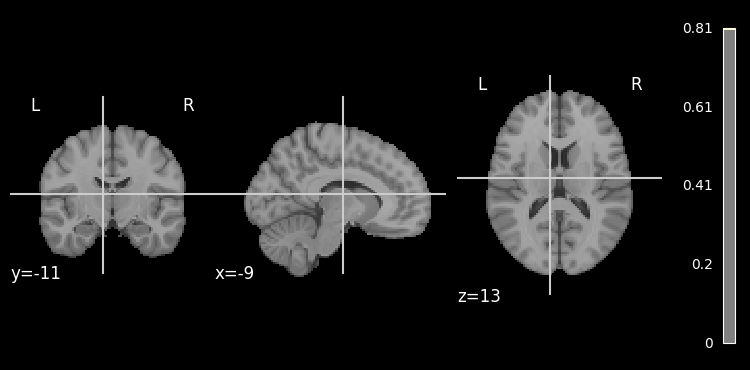

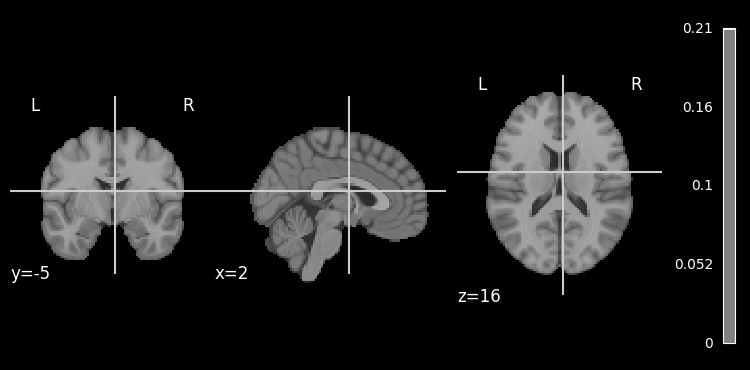

In [89]:
#mean(PD) - mean(HC)
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/baseline_PDvsHC_tfce_corrp_tstat1_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="inferno")
#mean(HC) - mean(PD)
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/baseline_PDvsHC_tfce_corrp_tstat2_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="inferno")

# Longitudinal Evaluation

## Control subjects: Baseline versus follow-up
* 

In [ ]:
medial prefrontal cortex
4th ventricle
hitting singuums kinda, not hitig parietal
mostly midline grey matter superior middle singulum (as opposed to their reporting white matter)

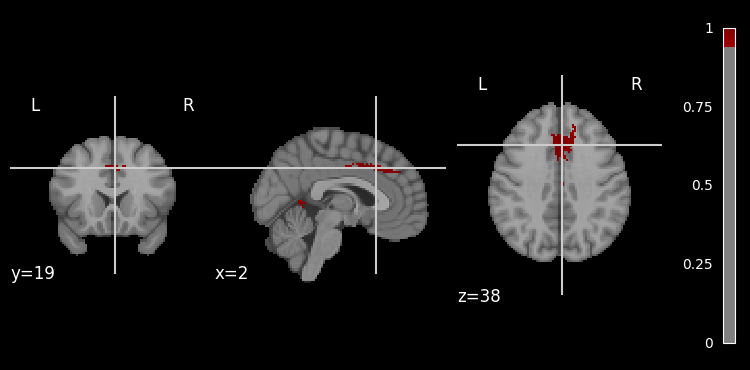

In [97]:
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/control_BLvsFU_tfce_corrp_tstat1_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!

## PD patients: Baseline versus follow-up

In [ ]:
opposite hemisphere...but mostly white matter.
Dothey have  L/R flip?

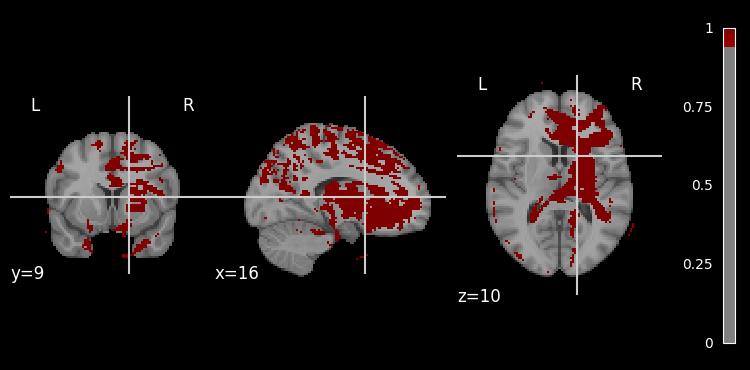

In [98]:
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/parkinsons_BLvsFU_tfce_corrp_tstat1_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!

## PD patients versus control subjects

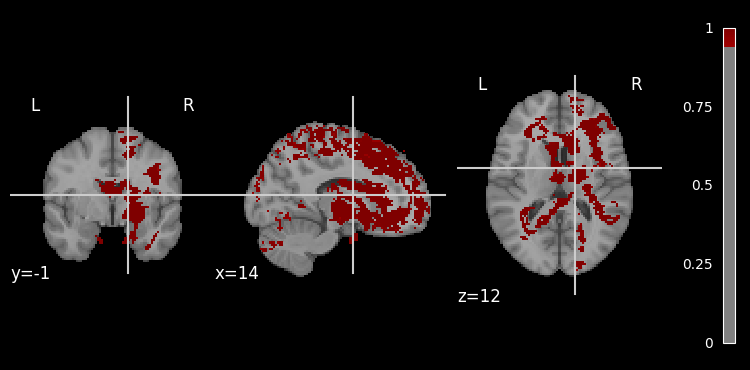

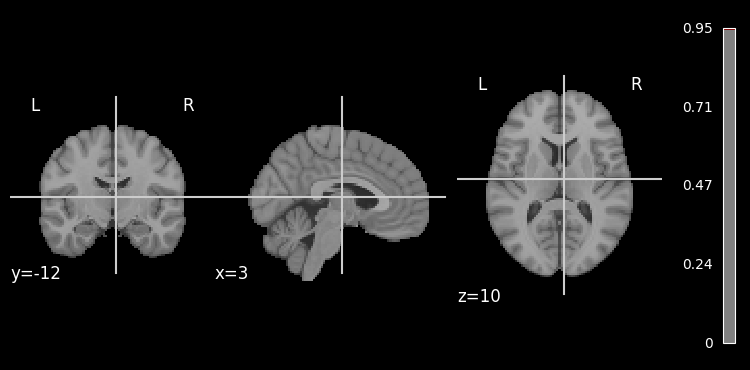

In [102]:
# mean(PD) - mean(HC)
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/longitudinal_PDvsHC_tfce_corrp_tstat1_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!
# mean(HC) - mean(PD)
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/longitudinal_PDvsHC_tfce_corrp_tstat2_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!

# PD Correlation analyses

## Baseline vs Demographics

In [ ]:
NHY significant correlation in cerebellum p 0.03

/home/jacob/Desktop/tessa_venv/lib/python3.10/site-packages/nilearn/plotting/find_cuts.py:148: UserWarning: Could not determine cut coords: All voxels were masked by the thresholding. Returning the center of mass instead.
  warnings.warn(
/home/jacob/Desktop/tessa_venv/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


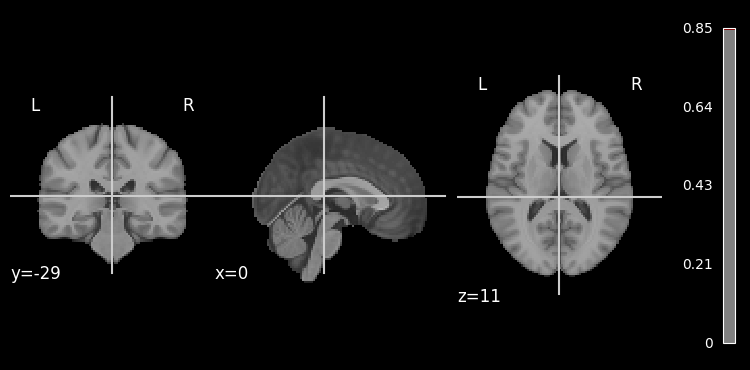

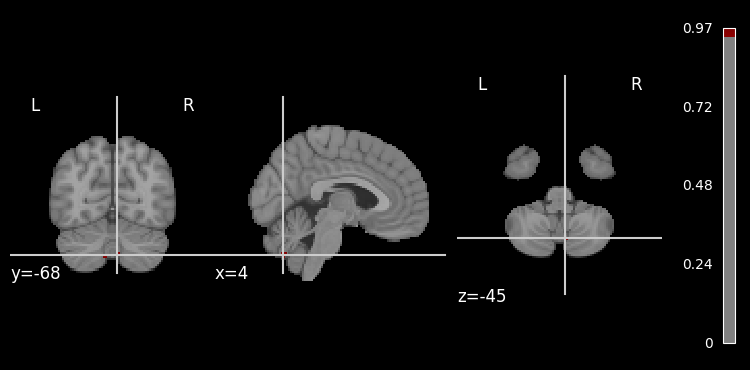

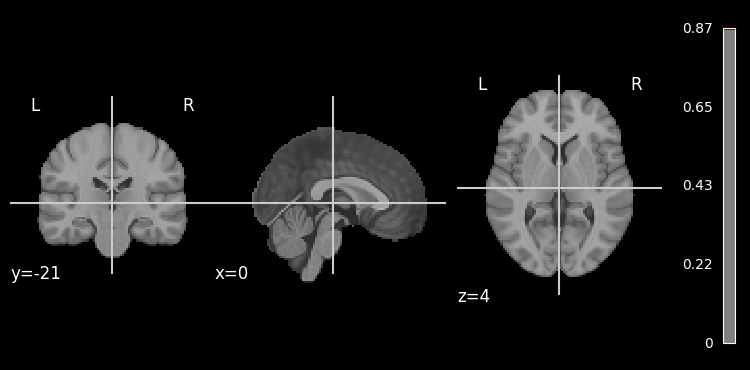

In [99]:
#NP3TOT
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_BL_tfce_corrp_tstat1_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!
#NHY
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_BL_tfce_corrp_tstat2_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!
#GDSTOT
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_BL_tfce_corrp_tstat3_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!

## Follow-up vs Demographics

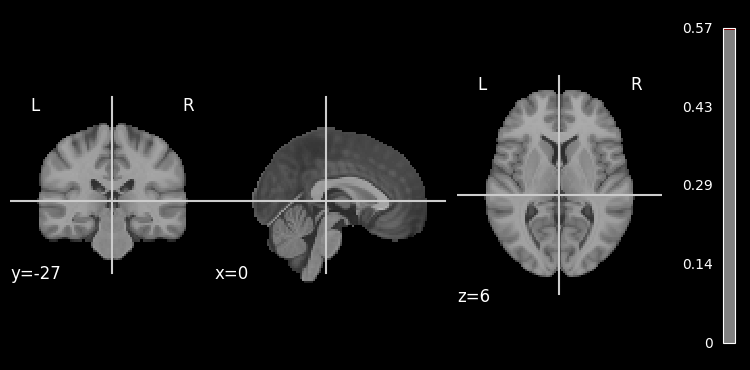

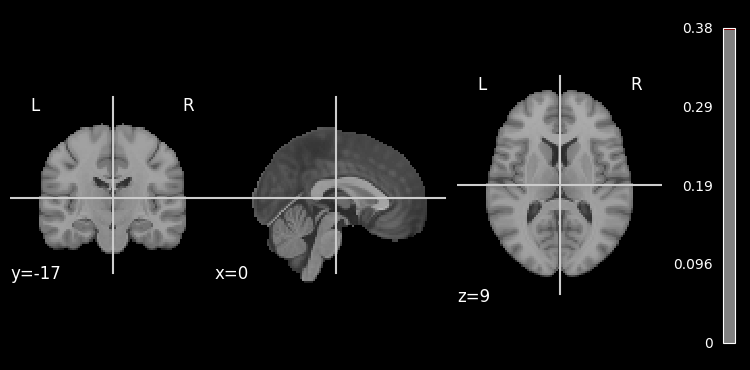

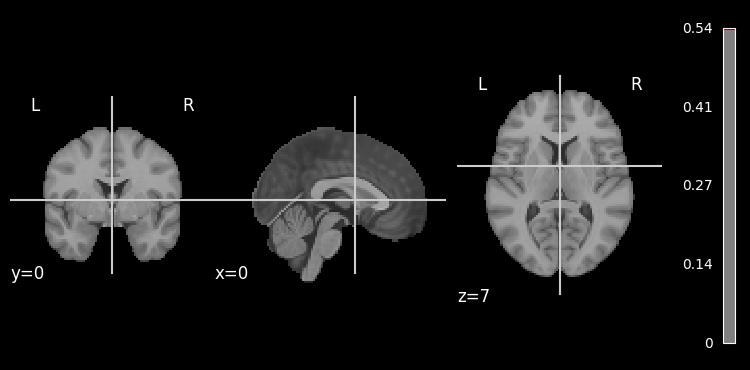

In [100]:
#NP3TOT
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_fu_tfce_corrp_tstat1_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!
#NHY
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_fu_tfce_corrp_tstat2_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!
#GDSTOT
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_fu_tfce_corrp_tstat3_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!

## Yearly average change vs Demographics

In [ ]:
right temporal pole
mention its on edge....mention very small activation. could be masking artifacts

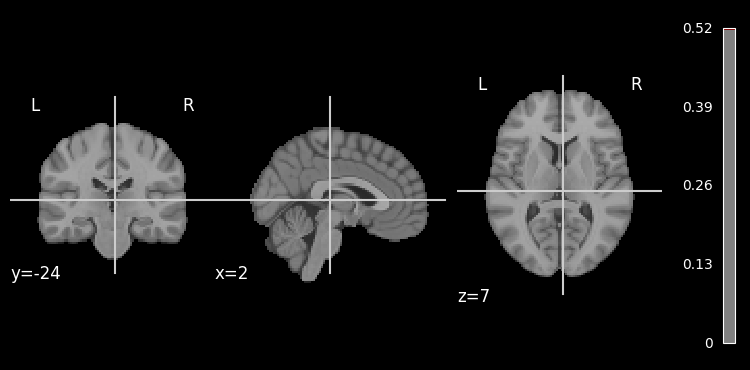

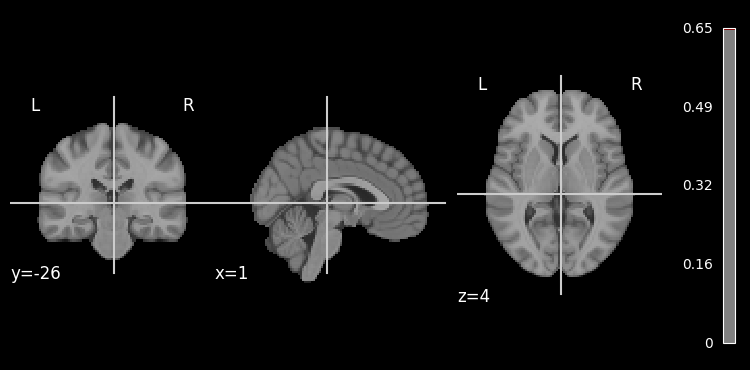

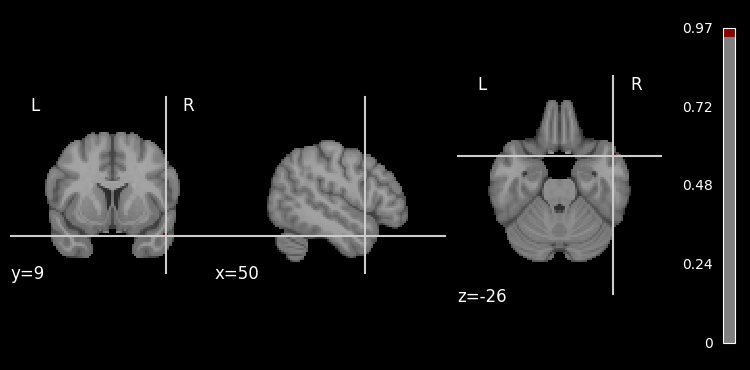

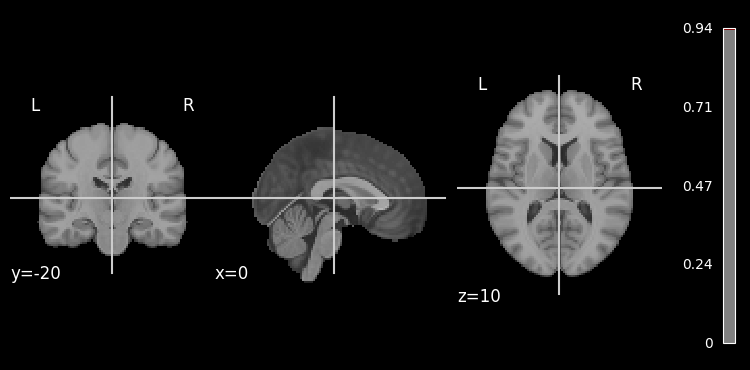

In [101]:
#Age
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_delta_tfce_corrp_tstat1_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!
#NP3TOT
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_delta_tfce_corrp_tstat2_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!
#NHY
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_delta_tfce_corrp_tstat3_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!
#GDSTOT
plotting.plot_stat_map("/home/jacob/Desktop/analysis/map2mni_nn/correlation_delta_tfce_corrp_tstat4_MNI_Warped.nii.gz", threshold=0.95, black_bg=True, cmap="jet") #Note this is 1-P output!